<CENTER><h1>DAV 6150 Module 3 Assignment Cleaning(Messy)Data</CENTER></h1>

<h5><CENTER>TEAM CONTRIBUTOR: ABDULLA MAMUN, RACHAEL OJOPAGOGO, MAPALO LUKASHI</CENTER></h5>

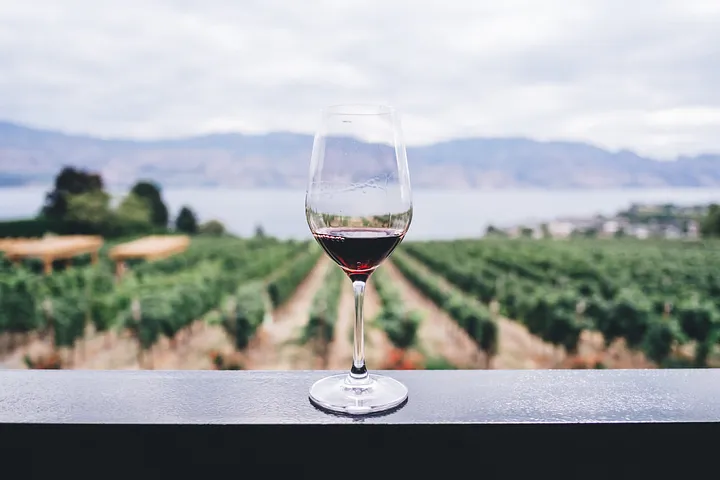

# Introduction

The wine quality dataset was created by Paulo Cortez and his colleagues from the University of Minho, Portugal. The wines covered in the dataset are from the Vinho Verde region of Portugal. The goal of creating this dataset is to do EDA and after EDA work prep the data for further maching learning task.

The data set you will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. The physicochemical tests measured various properties of the wines, such as acidity, alcohol, pH, etc. The sensory tests assigned a quality score to each wine sample, from 0 (very bad) to 8 (very good). The aim of this paper was to use machine learning techniques to predict wine quality based on the physicochemical features. The utility of of this dataset will be beneficial to wine certification entities, wine producers and consumers as well as professional or hobby wine tasters.

An overview of the data attributes is provided below:

__Feature Description:__

|Feature Name | Feature Description      |
|:------------| :-----------------------:| 
|INDEX        | Unique ID                |
|TARGET       |Response Variable (indicates # of cases of wine sold)|
|AcidIndex    |Measures total acidity of wine via a weighted average|
|Alcohol      |Alcohol Content|
|Chlorides    |Chloride content of the wine|
|CitricAcid   |Citric Acid content of the wine|
|Density      |Density of the wine|
|FixedAcidity |FixedAcidity of the wine|
|FreeSulfurDioxide|Sulfur Dioxide content of the wine|
|LabelAppeal  |Subjective marketing score that indicates the appeal of the design of the label on the bottle|
|ResidualSugar|Residual sugar content of the wine|
|STARS        |Wine rating as determined by experts (4 = excellent; 1 = Poor|
|Sulphates    |Sulfate content of the wine|
|TotalSulfurDioxide|Total sulfur dioxide content of the wine|
|VolatileAcidity|Volatile acid content of the wine|
|pH           |pH of the wine|


## Problem Statement

We should also identify any potential data integrity issues (e.g., missing data values; invalid data values; etc.) as well as data distribution issues (e.g., severe skew that can potentially impede the training/performance of a machine learning 
model).Our final goal is to provide an EDA that is thorough and succinct without it being so detailed that a reader will lose interest in it.

## Methodology

To solve this task, We will follow few steps. The steps are-

- Load the data "M3_Data.csv" into Github.
- Then using a jupyter notebook with python library pandas read the data set from Github Repository by using Pandas CSV read function.
- After data reading we will  perform Exploratory Data Analysis as following steps:

    - Descriptive Statistics: Assess basic statistical details of the dataset.

    - Missing Value Analysis: Identify missing values in the dataset.

    - Outliers Identification: Look for any potential outliers in the data.

    - Data Distribution Assessment: Understand the skewness or kurtosis of the data.

    - Visualization: Create plots such as histograms and box plots for visual analysis.

- After EDA work, we will do data preparation like identify data types and conversion if needed, outliers handling, duplicate handling, missing values imputation, transform data distribution using 'box cox' method, scale the data using Normalization or Standardization, for categorical data use dummy variables, finally find the best quality data for machine learning model building. 

## Data Loading & Manipulation

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd

# Importing Statistical packages
from scipy import stats
from scipy.stats import norm, probplot, boxcox

# Import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Ensure to install !pip install missingno

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Import filterwarnngs  from warnings to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for Data preparation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import the KNNimputer class
from sklearn.impute import KNNImputer


### Read the data 

In [2]:
# Provide the raw URL of the CSV file
url = "https://raw.githubusercontent.com/mamun21616/DAV-6150/main/M3_Data.csv"

# Read the CSV file into a DataFrame
wine_df = pd.read_csv(url)

# Display the first five observations from the whole dataset
wine_df.head()

Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0           0      1       3           3.2            1.160        0.98   
1           1      2       3           4.5            0.160        0.81   
2           2      4       5           7.1            2.640        0.88   
3           3      5       3           5.7            0.385        0.04   
4           4      6       4           8.0            0.330        1.26   

   ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  \
0           54.2      0.567                NaN               268.0  0.99280   
1           26.1      0.425               15.0               327.0  1.02792   
2           14.8      0.037              214.0               142.0  0.99518   
3           18.8      0.425               22.0               115.0  0.99640   
4            9.4        NaN              167.0               108.0  0.99457   

     pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0  3.33       0.59      9.9            0          8    2.0  
1  3.38       0.70      NaN           -1          7    3.0  
2  3.12       0.48     22.0           -1          8    3.0  
3  2.24       1.83      6.2           -1          6    1.0  
4  3.12       1.77     13.7            0          9    2.0

In [3]:
# Drop the first column from the DataFrame
wine_df.columns = wine_df.columns.str.lower()

In [4]:
# Check the shape of data (number of rows and column)
wine_df.shape

(12795, 17)

The dataset contains 12795 observations and 16 attributes.

Now we will see the detailed description of all the attributes in the dataset.

In [5]:
# Provides a concise summary of dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   unnamed: 0          12795 non-null  int64  
 1   index               12795 non-null  int64  
 2   target              12795 non-null  int64  
 3   fixedacidity        12795 non-null  float64
 4   volatileacidity     12795 non-null  float64
 5   citricacid          12795 non-null  float64
 6   residualsugar       12179 non-null  float64
 7   chlorides           12157 non-null  float64
 8   freesulfurdioxide   12148 non-null  float64
 9   totalsulfurdioxide  12113 non-null  float64
 10  density             12795 non-null  float64
 11  ph                  12400 non-null  float64
 12  sulphates           11585 non-null  float64
 13  alcohol             12142 non-null  float64
 14  labelappeal         12795 non-null  int64  
 15  acidindex           12795 non-null  int64  
 16  star

Dataset observation:

- This is a type of pandas Dataframe

- Index ranges from 0-12794

- Total number of attributes are 16

- All 16 attributes are numerical data type

- Notice that most of the attributes have null values, meaning that there is missing values

- Dataset used computer memory 41.8+KB.

In [6]:
# Drop column name unname:0 and index as unique id which dont carry any significant value in our wine data nalaysis
wine_df.drop(columns = ['unnamed: 0', 'index'], axis = 1, inplace = True)

# Exploratory Data Analysis (EDA)
Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. In this EDA process start with Univariate analysis, Bivariate analysis.

## Summary of Statistics
We can explore statistical summary of our data to see the overview of the whole data in a table format and will explain more details about this table of data meaning. 

In [7]:
# Summary statistics can be obtained by using describe function
wine_df.describe().T

count        mean         std      min        25%  \
target              12795.0    3.029074    1.926368  0.00000    2.00000   
fixedacidity        12795.0    8.063251    4.996119  0.00000    5.60000   
volatileacidity     12795.0    0.641086    0.555614  0.00000    0.25000   
citricacid          12795.0    0.686315    0.606005  0.00000    0.28000   
residualsugar       12179.0   23.367809   24.945667  0.00000    3.60000   
chlorides           12157.0    0.222559    0.234288  0.00000    0.04600   
freesulfurdioxide   12148.0  106.679042  108.102694  0.00000   28.00000   
totalsulfurdioxide  12113.0  204.319120  163.116881  0.00000  100.00000   
density             12795.0    0.994203    0.026538  0.88809    0.98772   
ph                  12400.0    3.207628    0.679687  0.48000    2.96000   
sulphates           11585.0    0.846668    0.655612  0.00000    0.43000   
alcohol             12142.0   10.523778    3.629154  0.00000    9.00000   
labelappeal         12795.0   -0.009066    0.891089 -2.00000   -1.00000   
acidindex           12795.0    7.772724    1.323926  4.00000    7.00000   
stars                9436.0    2.041755    0.902540  1.00000    1.00000   

                          50%         75%         max  
target                3.00000    4.000000     8.00000  
fixedacidity          7.00000    9.800000    34.40000  
volatileacidity       0.41000    0.910000     3.68000  
citricacid            0.44000    0.970000     3.86000  
residualsugar        12.90000   38.700000   141.15000  
chlorides             0.09800    0.368000     1.35100  
freesulfurdioxide    56.00000  172.000000   623.00000  
totalsulfurdioxide  154.00000  262.000000  1057.00000  
density               0.99449    1.000515     1.09924  
ph                    3.20000    3.470000     6.13000  
sulphates             0.59000    1.100000     4.24000  
alcohol              10.40000   12.400000    26.50000  
labelappeal           0.00000    1.000000     2.00000  
acidindex             8.00000    8.000000    17.00000  
stars                 2.00000    3.000000     4.00000

- The count, mean, min, and max rows are self-explanatory. 
- The std row shows the standard deviation, which measures how dispersed the values are. 
- The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the Alcohol lower than 9. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).
- Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute.  

- We will see next EDA section for univariate analysis, bivariate analysis, multivariate analysis. 


## Checking Duplicated Values in the Dataset

In [8]:
wine_df.duplicated().sum()

0

There is no duplicate data.

## Identifying the Missing Values

In [9]:
# Check the missing values
wine_df.isnull().sum()

target                   0
fixedacidity             0
volatileacidity          0
citricacid               0
residualsugar          616
chlorides              638
freesulfurdioxide      647
totalsulfurdioxide     682
density                  0
ph                     395
sulphates             1210
alcohol                653
labelappeal              0
acidindex                0
stars                 3359
dtype: int64

We can observe several attributes have missing values. Now we will see more concise way about the percent of missing data in the context of whole data for each and individual feature.

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = (wine_df.isnull().sum() / len(wine_df)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({
    'Column': wine_df.columns,
    'Missing Percentage': missing_percentage
})

# Display the missing data information
missing_data


Column  Missing Percentage
target                          target            0.000000
fixedacidity              fixedacidity            0.000000
volatileacidity        volatileacidity            0.000000
citricacid                  citricacid            0.000000
residualsugar            residualsugar            4.814381
chlorides                    chlorides            4.986323
freesulfurdioxide    freesulfurdioxide            5.056663
totalsulfurdioxide  totalsulfurdioxide            5.330207
density                        density            0.000000
ph                                  ph            3.087143
sulphates                    sulphates            9.456819
alcohol                        alcohol            5.103556
labelappeal                labelappeal            0.000000
acidindex                    acidindex            0.000000
stars                            stars           26.252442

Based on percentage, stars has the highest percent of missing values 26.25%, sulphates has 9.45 % and rest of the features have less than 5%. Now we will see how it looks graphically.

In [11]:
# Display the attributes missing values in Percentage
fig = px.bar(missing_data, x=missing_data.index, y='Missing Percentage', 
             title='Percentage of Missing Values in Each Column',
             labels={'Columns': missing_data.index, 'Missing Percentage': 'Missing Percentage'},
             height=400, width=800, color_discrete_sequence=['orange'])

fig.update_layout(xaxis=dict(tickangle=-45, tickmode='array', tickvals=missing_data.index),
                  yaxis=dict(title='Missing Percentage'))

fig.show();

Stars has the most missing values, and then sulphates and rest of features have significantly less null values compare to dataset, about < 5%. We will see also in matrix, how it looks.

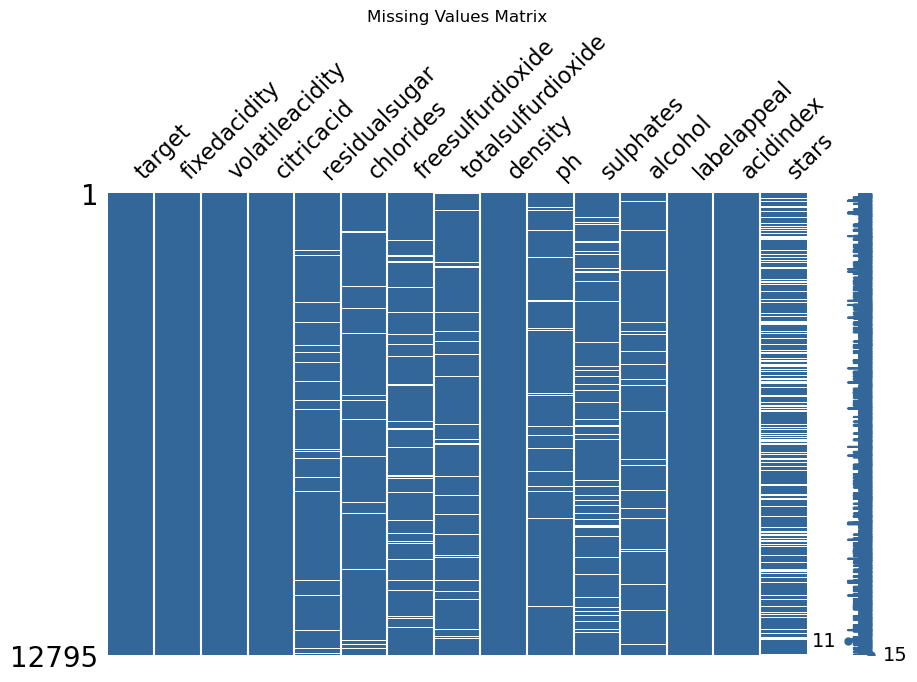

In [12]:
# Create a matrix plot to visualize missing values in the DataFrame
# figsize=(10, 6) sets the size of the plot, and color=(0.2, 0.4, 0.6) sets the color of the matrix
msno.matrix(wine_df, figsize=(10, 6), color=(0.2, 0.4, 0.6))

# Set the title of the plot
plt.title('Missing Values Matrix')

# Display the plot
plt.show();

Missingo is an alternative way to observe the whole data and missing values inside that dataset by each variable.

## Univariate Analysis

### Distribution of Target Variable

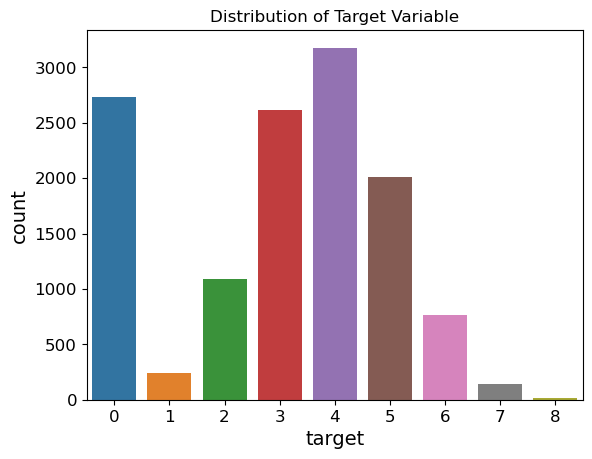

In [13]:
# Create a countplot for the 'target' variable in the DataFrame
sns.countplot(x='target', data=wine_df)

# Set the title of the plot
plt.title('Distribution of Target Variable')

# Display the plot
plt.show();

The target variable is the ‘quality’ column which has values from 0 to 8 in ordinal progression. That is, 0 in this dataset will be the lowest quality , while 8 is the highest quality. Bad quality of wine is the 0 which is the second highest and better quality wine is target 4 which is the highest amount.Average quality of wine is more frequent compare to bad and best quality. Target 3, 4 and 5 have the most value in the dataset. 

### Displaying univariate analysis with graph for all numerical features

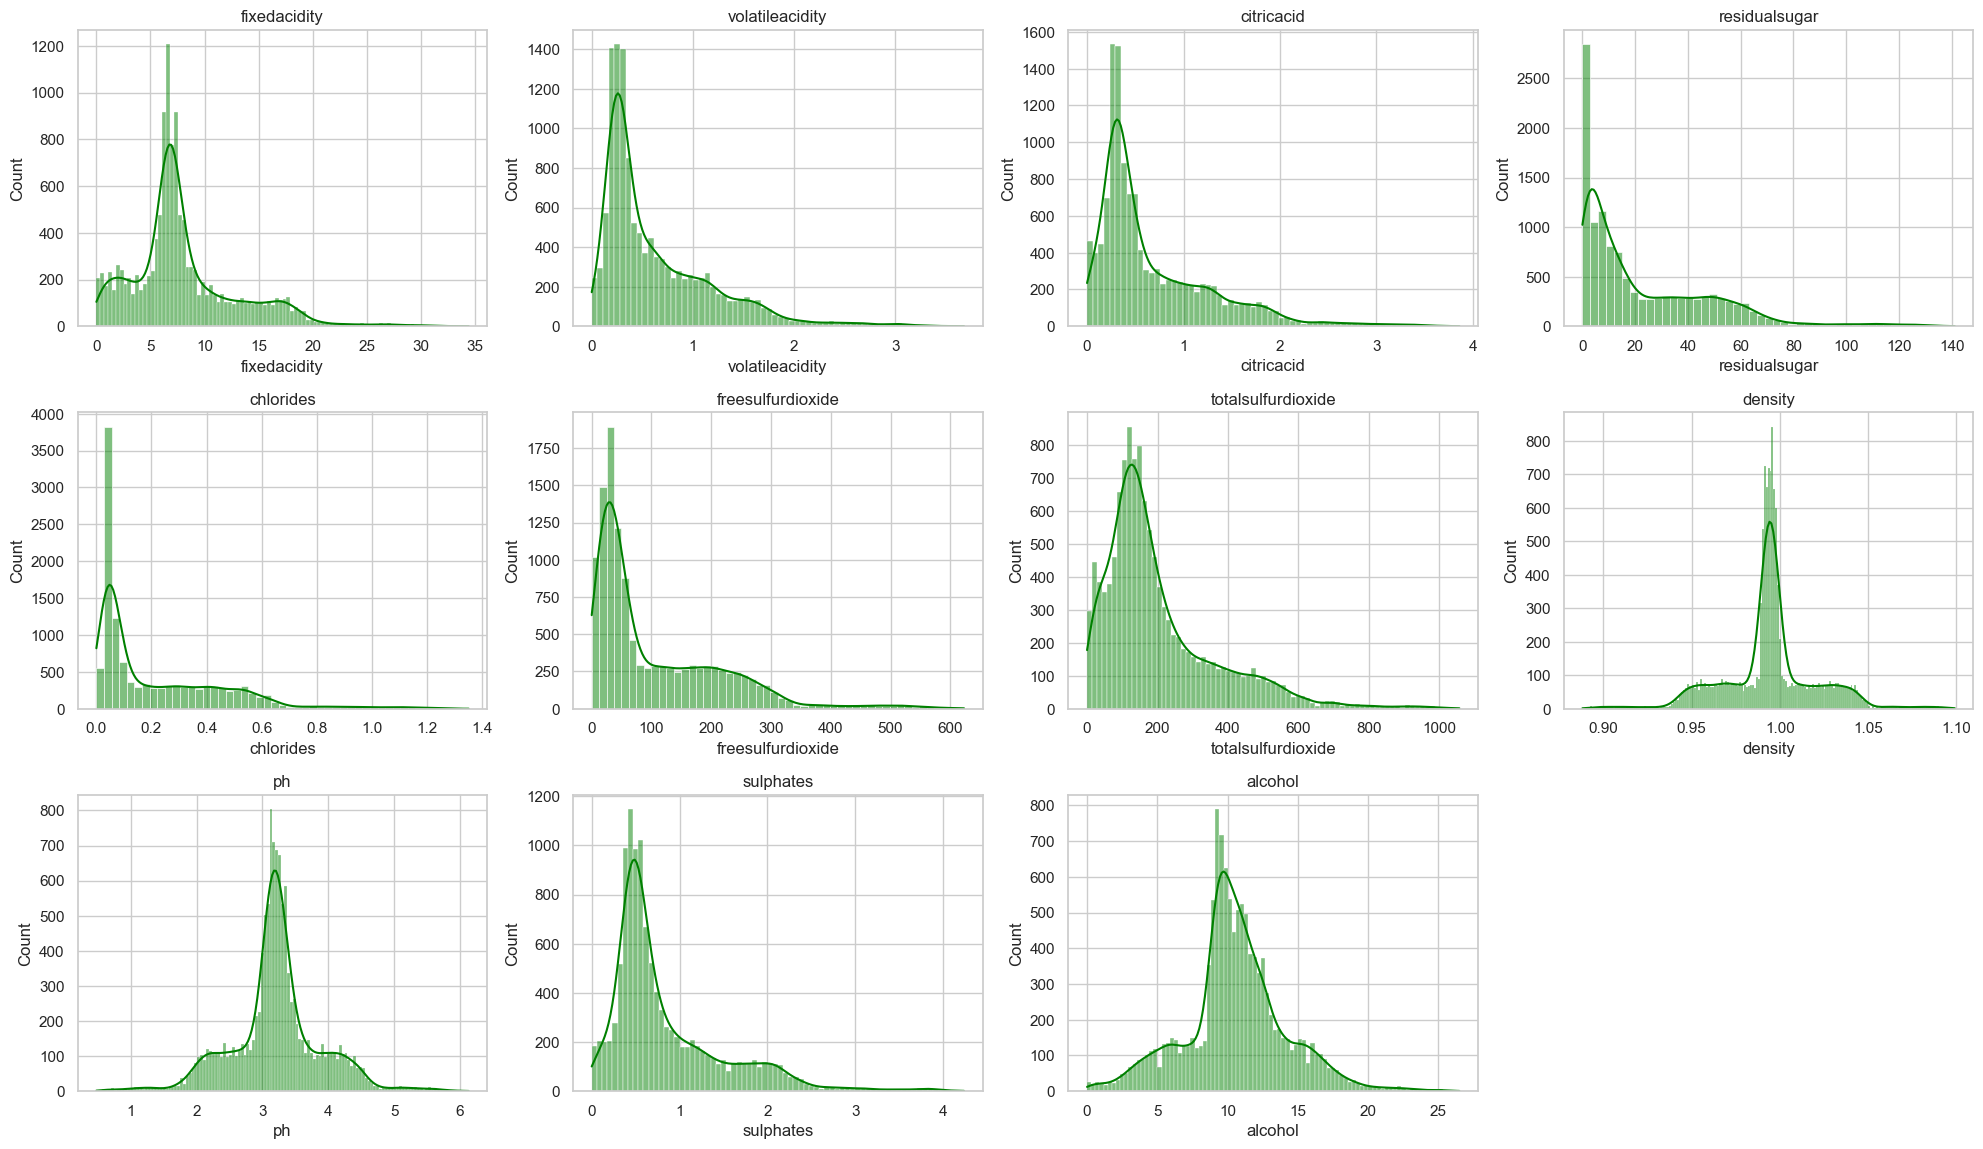

In [14]:
# Set Seaborn style to 'whitegrid' for better visualization aesthetics
sns.set(style="whitegrid")

# Specify the columns to be plotted
columns_to_plot = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide',
                   'totalsulfurdioxide', 'density', 'ph', 'sulphates', 'alcohol']

# Create histograms for selected columns
plt.figure(figsize=(20, 15))  # Set the overall size of the subplot grid

# Loop through the selected columns to create individual histograms
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  # Create subplots in a 4x4 grid
    sns.histplot(wine_df[column], kde=True, color = 'green')  # Create a histogram with kernel density estimation
    plt.title(column)  # Set the title of each subplot to the column name

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Display the plot


In this dataset, the variables “fixed acidity”, “volatile acidity”, “citric acid”, “residual sugar”, “chlorides”, “free sulfur dioxide”, “total sulfur dioxide”, and “sulphates” are all right-skewed, meaning that they have a long tail on the right side and most of the values are concentrated on the left side. This indicates that these variables have some outliers or extreme values that are much higher than the rest of the data.
The variable “pH” and "density" are approximately symmetric, meaning that it has a bell-shaped curve and the values are evenly distributed around the center. This indicates that this variable follows a normal distribution, which is a common assumption for many statistical tests and models.
The variable “alcohol” is left-skewed, meaning that it has a long tail on the left side and most of the values are concentrated on the right side. This indicates that this variable has some outliers or extreme values that are much lower than the rest of the data.


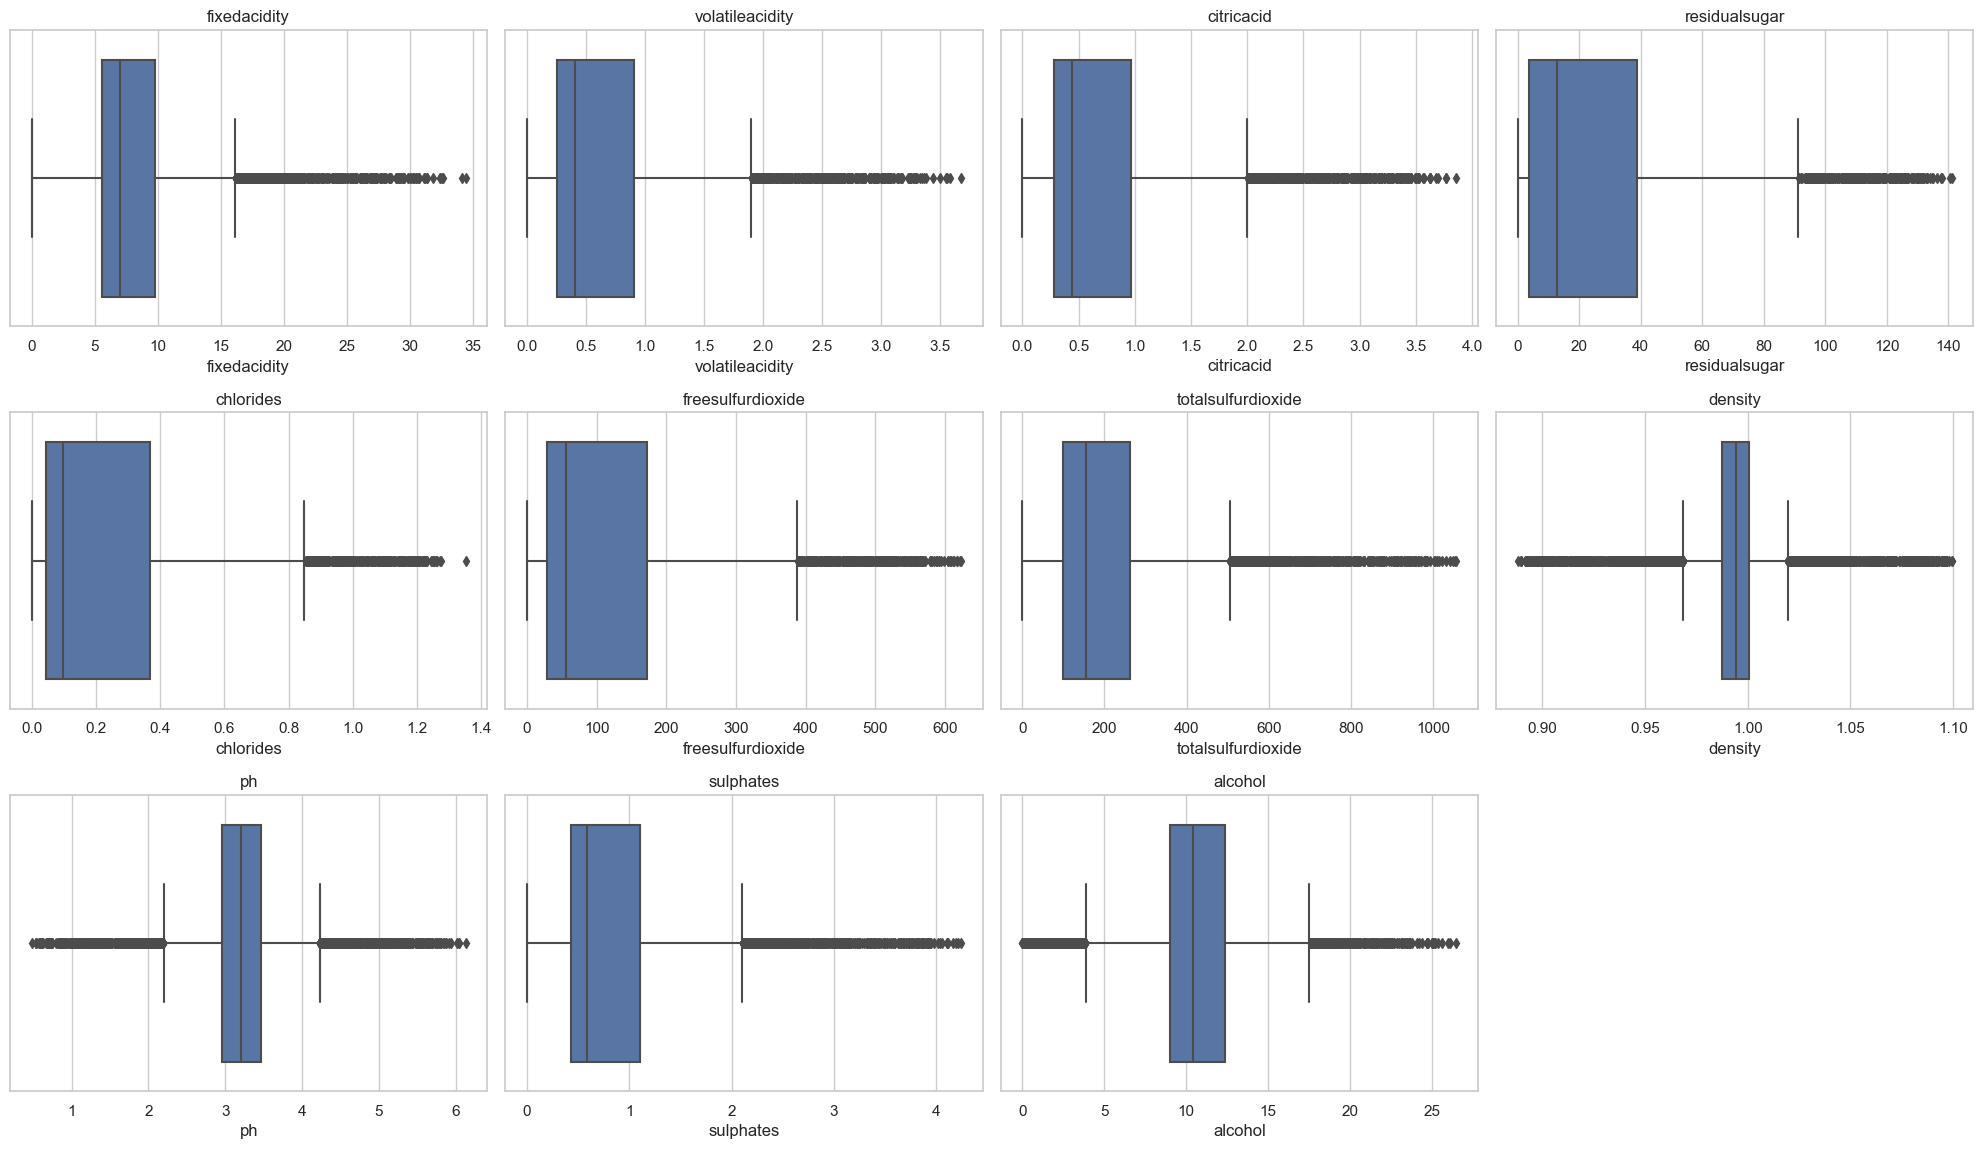

In [15]:
# Creating box plots for selected columns
# Creating box plots for selected columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=wine_df, x=column)
    plt.title(column)
plt.tight_layout()
plt.show();

from the box plot we can also see the outliers exist outside the whisker, a deviation from mean, median and mode exists due to that outliers. 

## Bivariate Analysis
A bivariate analysis can point out correlation, causation and distribution of mean and medians of features across each quality value.
The following boxplots show how the target(quality) of wine varies with each of its physicochemical properties. We can draw some important inferences from these graphs, such as:

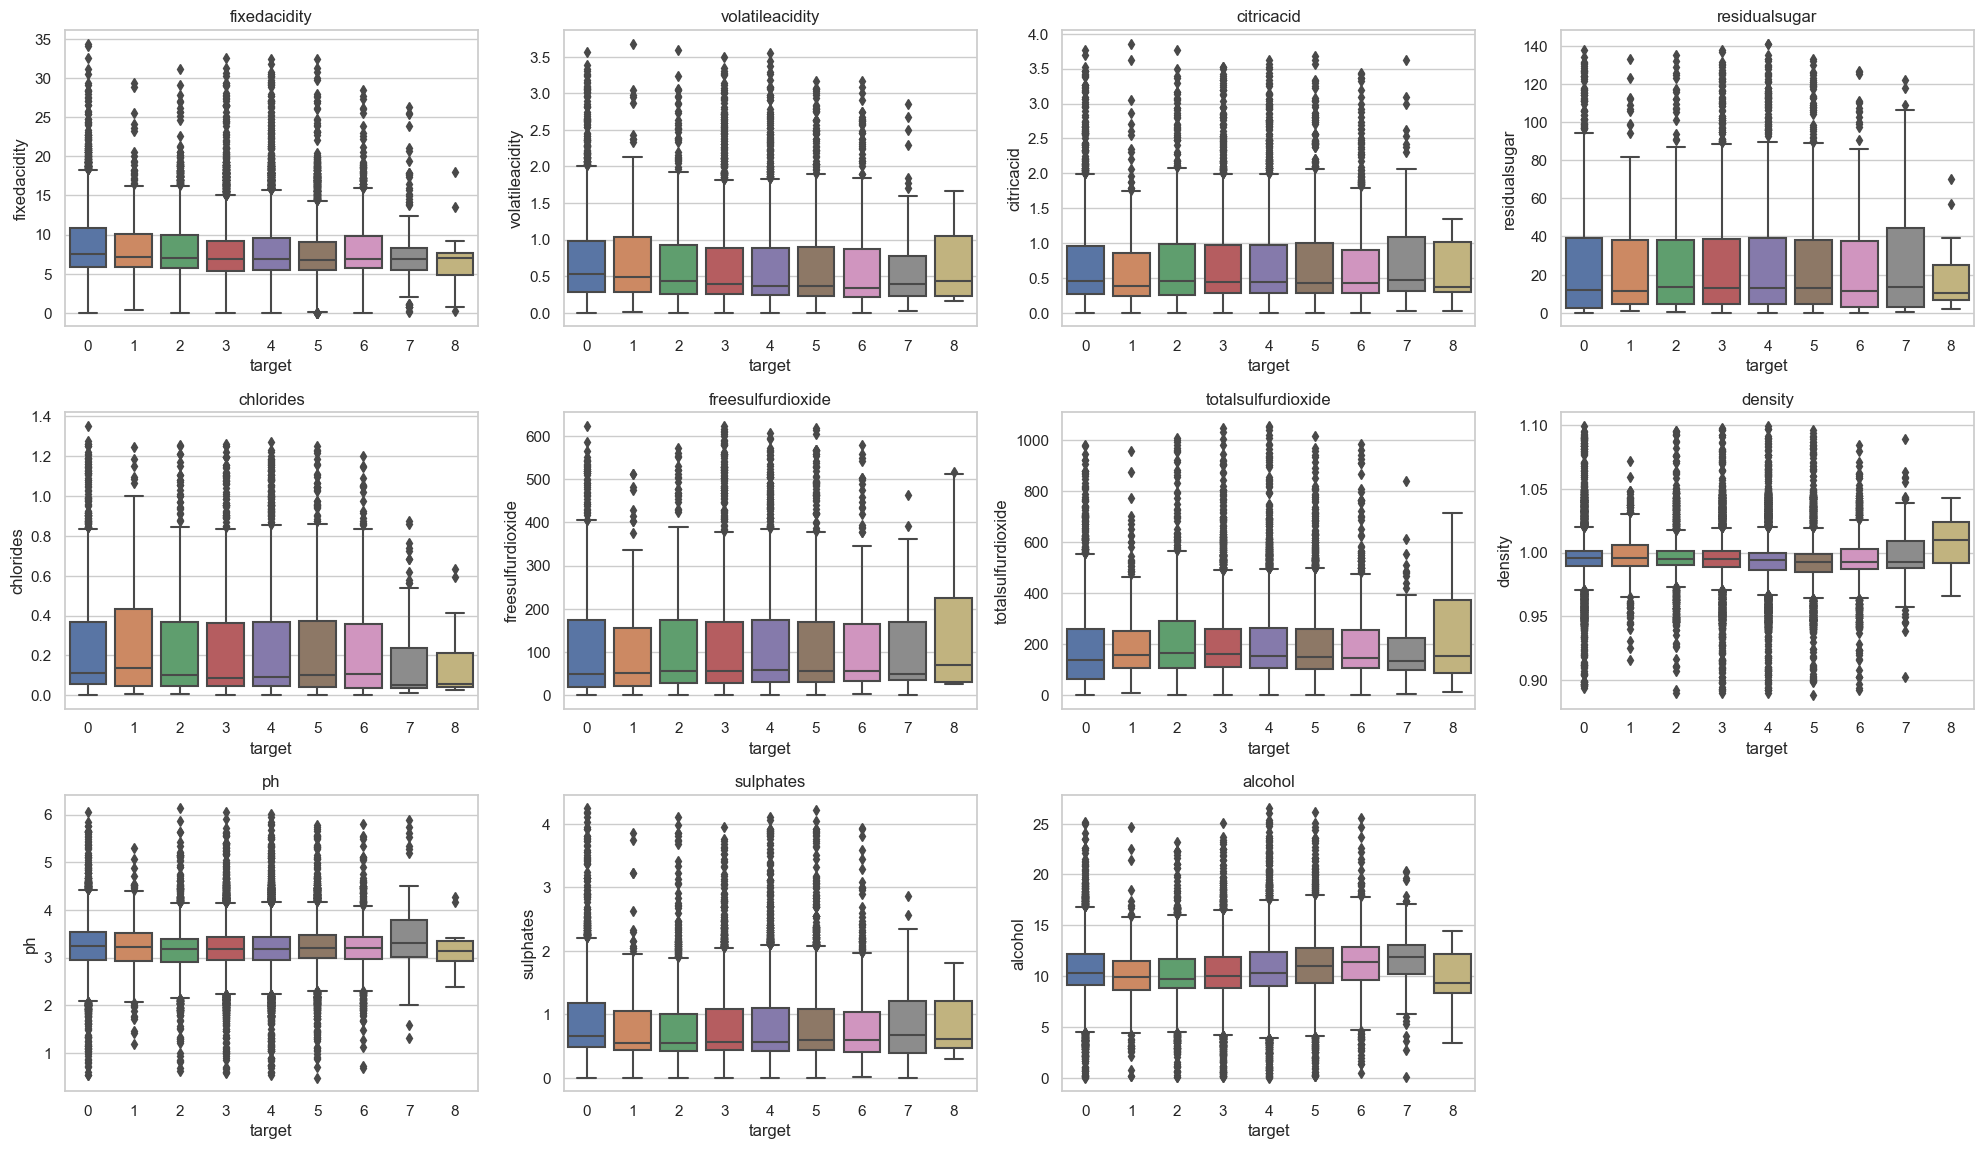

In [16]:
# Set Seaborn style to 'whitegrid' for better visualization aesthetics
sns.set(style="whitegrid")

# Specify the columns to be plotted
columns_to_plot = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide',
                   'totalsulfurdioxide', 'density', 'ph', 'sulphates', 'alcohol']

# Create box plots for selected columns with respect to the 'target' variable
plt.figure(figsize=(20, 15))  # Set the overall size of the subplot grid

# Loop through the selected columns to create individual box plots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)  # Create subplots in a 4x4 grid
    sns.boxplot(data=wine_df, x='target', y=column)  # Specify 'target' as the x-axis and the selected column as the y-axis
    plt.title(column)  # Set the title of each subplot to the column name

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Display the plot


- 8 quality wines have a lower volatile acidity which is desirable in a good quality wine.
- Mean Residual sugar is very low and most wines lie in the range of 9, which indicates the presence of largely dry wines.
- Density is ideal among more than 75% of the wines.
- pH levels are within the range of ideal of 3.2 and 3.6, barring outliers. Quality 2-6 wines with outliers of pH values beyond 3.6 consequently shows the presence of higher sulphate content to add acidity.
- 5-7 quality wines show higher contents of alcohol, though it is still low alcohol level for wine in general. Target 8 is the best quality because of have lower alcohol range.

## Relation between target and features

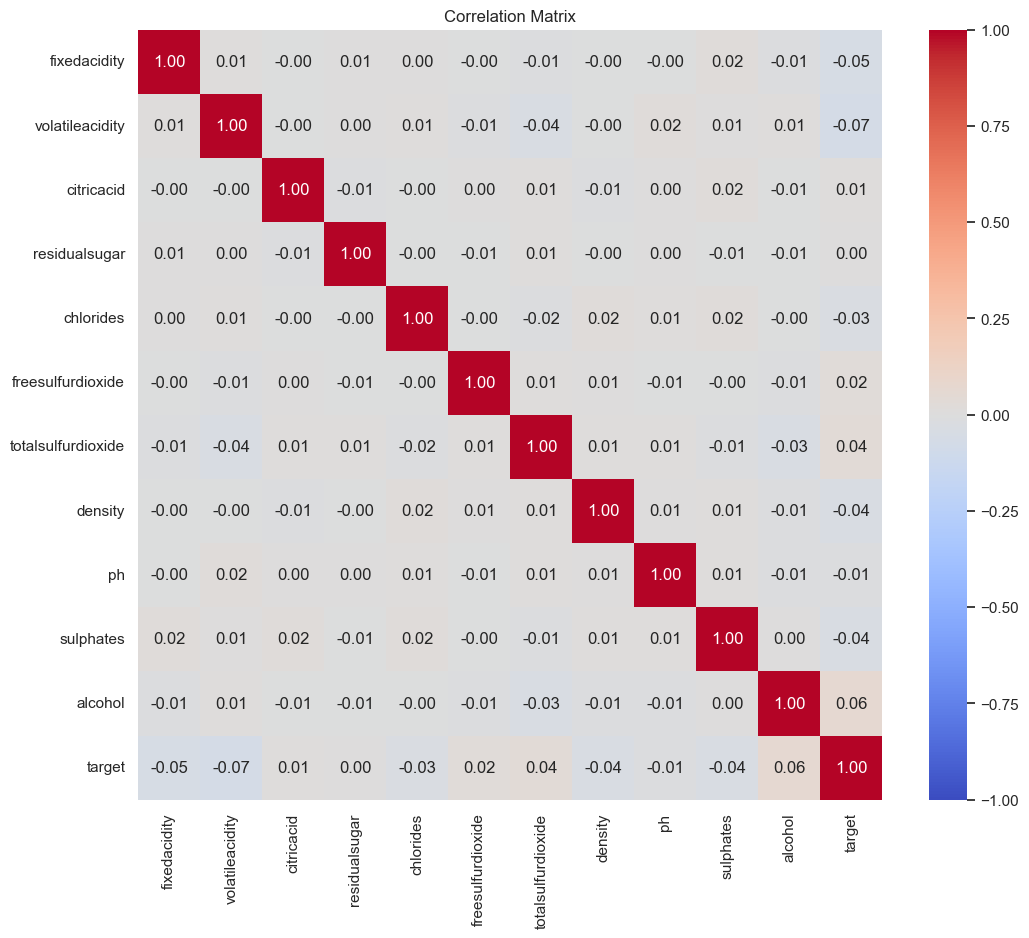

In [17]:
# Select the relevant columns for the correlation matrix
selected_columns = ['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar', 'chlorides', 'freesulfurdioxide',
                    'totalsulfurdioxide', 'density', 'ph', 'sulphates', 'alcohol', 'target']

# Create a new DataFrame with only the selected columns
selected_df = wine_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Set the title of the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show();


Two different patterns can be observed. 

First, there are positive relationships between target and critic.acid, alcohol, and sulphates. Even though wines with a higher level of alcohol may make them less popular, they should be highly rated in target. 

Second, there are negative relationships between target and volatileacidity, density, and pH. It is reasonable that less sweet wines and a lower level of acidity are favored in quality testings. Last, these independent variables show no significant relationship with target: residualsugar, citricacid, and freesulfurdioxide.

# Data Preparation

## Filling the Missing Value

In [18]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_imputation = imputer.fit_transform(wine_df)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",after_imputation)



After performing imputation
 [[ 3.    3.2   1.16 ...  0.    8.    2.  ]
 [ 3.    4.5   0.16 ... -1.    7.    3.  ]
 [ 5.    7.1   2.64 ... -1.    8.    3.  ]
 ...
 [ 4.    6.    0.17 ...  0.    6.    2.  ]
 [ 3.    7.7   0.32 ... -1.    6.    2.  ]
 [ 4.    5.2   0.04 ...  0.    7.    2.  ]]


__Inference__

We have used KNNImputer for filling the null values because we thought this will give us best result for our model building. We have used KNN = 3, but we can try also use other value like 2-5, and also can use median in some cases. 

In [19]:
# Drop non-numeric columns (if any) for simplicity
numeric_df = wine_df.select_dtypes(include=['number'])
# Scale the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Inverse transform to get back the original scale
imputed_df = pd.DataFrame(scaler.inverse_transform(after_imputation), columns=numeric_df.columns)

# Update the original DataFrame with the imputed values
numeric_df.update(imputed_df)

In [20]:
# Checking is there any null values present or not
numeric_df.isna().sum()

target                0
fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
ph                    0
sulphates             0
alcohol               0
labelappeal           0
acidindex             0
stars                 0
dtype: int64

# Prepped Data Review

## Display the missing values after filling

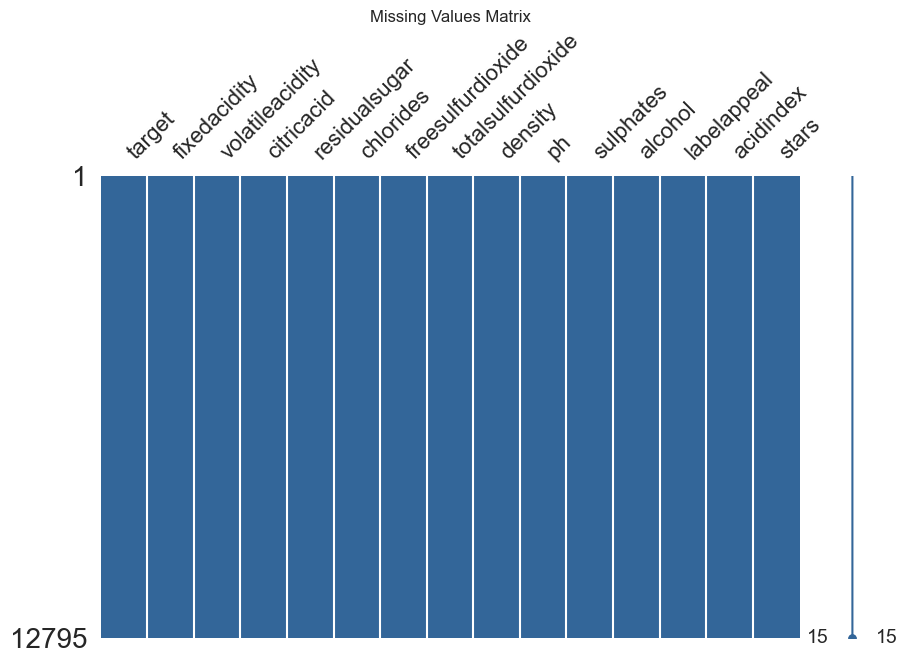

In [21]:
# Create a matrix plot to visualize missing values in the DataFrame
# figsize=(10, 6) sets the size of the plot, and color=(0.2, 0.4, 0.6) sets the color of the matrix
msno.matrix(numeric_df, figsize=(10, 6), color=(0.2, 0.4, 0.6))

# Set the title of the plot
plt.title('Missing Values Matrix')

# Display the plot
plt.show();

We can see data is clean, no more null values present in the dataframe.

## Handling Outliers

In [22]:
from collections import Counter

def handle_outliers(data, columns_to_handle):
    """
    Handle outliers in specified columns using the Interquartile Range (IQR) method.

    Parameters:
    - data: DataFrame containing the data
    - columns_to_handle: List of column names for which outliers should be handled

    Returns:
    - DataFrame with outliers replaced by median values
    """

    outlier_indices = []

    # Iterate through the specified columns
    for column in columns_to_handle:
        # 1st quartile
        Q1 = np.percentile(data[column], 25)
        # 3rd quartile
        Q3 = np.percentile(data[column], 75)
        # Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # Detect outliers and their indices
        outlier_list_col = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)].index
        # Store indices of outliers
        outlier_indices.extend(outlier_list_col)

    # Count occurrences of each index
    outlier_indices_counter = Counter(outlier_indices)
    # Get indices with occurrences greater than 1.5 times
    multiple_outliers = [i for i, v in outlier_indices_counter.items() if v > 1.5]

    # Handling outliers by replacing them with the median
    for column in columns_to_handle:
        # Replace outliers with the median of the respective column
        data[column].loc[multiple_outliers] = data[column].median()

    return data

# Specify the columns to handle outliers
columns_to_handle_outliers = ['fixedacidity', 'residualsugar', 'freesulfurdioxide', 'totalsulfurdioxide', 'sulphates', 'volatileacidity', 'citricacid', 'chlorides']

# Apply the handle_outliers function to the DataFrame
df_without_outliers = handle_outliers(numeric_df, columns_to_handle_outliers)


## Identify Skewness in the Data

In [23]:
def check_skewness(columnName, data):
    """ Defines a function that checks the skewness of a specified column in a given DataFrame.
        Extract the specified column from the DataFrame.
        Remove missing or infinite values from the column data.
        Calculate the mean (mu) and standard deviation (sigma) for normal distribution fitting.
        Print the mean and standard deviation before skewness correction.
        Plot the distribution of the column data with a fitted normal distribution.
        Plot a probability plot to assess normality.
    """
    print("Before Correcting")
    
    # Handling missing or infinite values
    column_data = data[columnName]
    column_data = column_data[~np.isnan(column_data) & np.isfinite(column_data)]

    # Calculate mean (mu) and standard deviation (sigma) for normal distribution fitting
    mu, sigma = norm.fit(column_data)
    print(f"Mu before correcting {columnName.upper()}: {mu}, Sigma before correcting {columnName.upper()}: {sigma}")

    # Create a subplot with two plots side by side
    plt.figure(figsize=(20, 10))

    # Plot 1: Distribution plot with fitted normal distribution
    plt.subplot(1, 2, 1)
    sns.distplot(column_data, fit=norm, color="orange")
    plt.title(f"{columnName.upper()} Distplot before Skewness Correction", color="black")

    # Plot 2: Probability plot for assessing normality
    plt.subplot(1, 2, 2)
    probplot(column_data, plot=plt)

    # Display the plots
    plt.show();


Before Correcting
Mu before correcting FIXEDACIDITY: 47.005371070230666, Sigma before correcting FIXEDACIDITY: 23.211457725549643


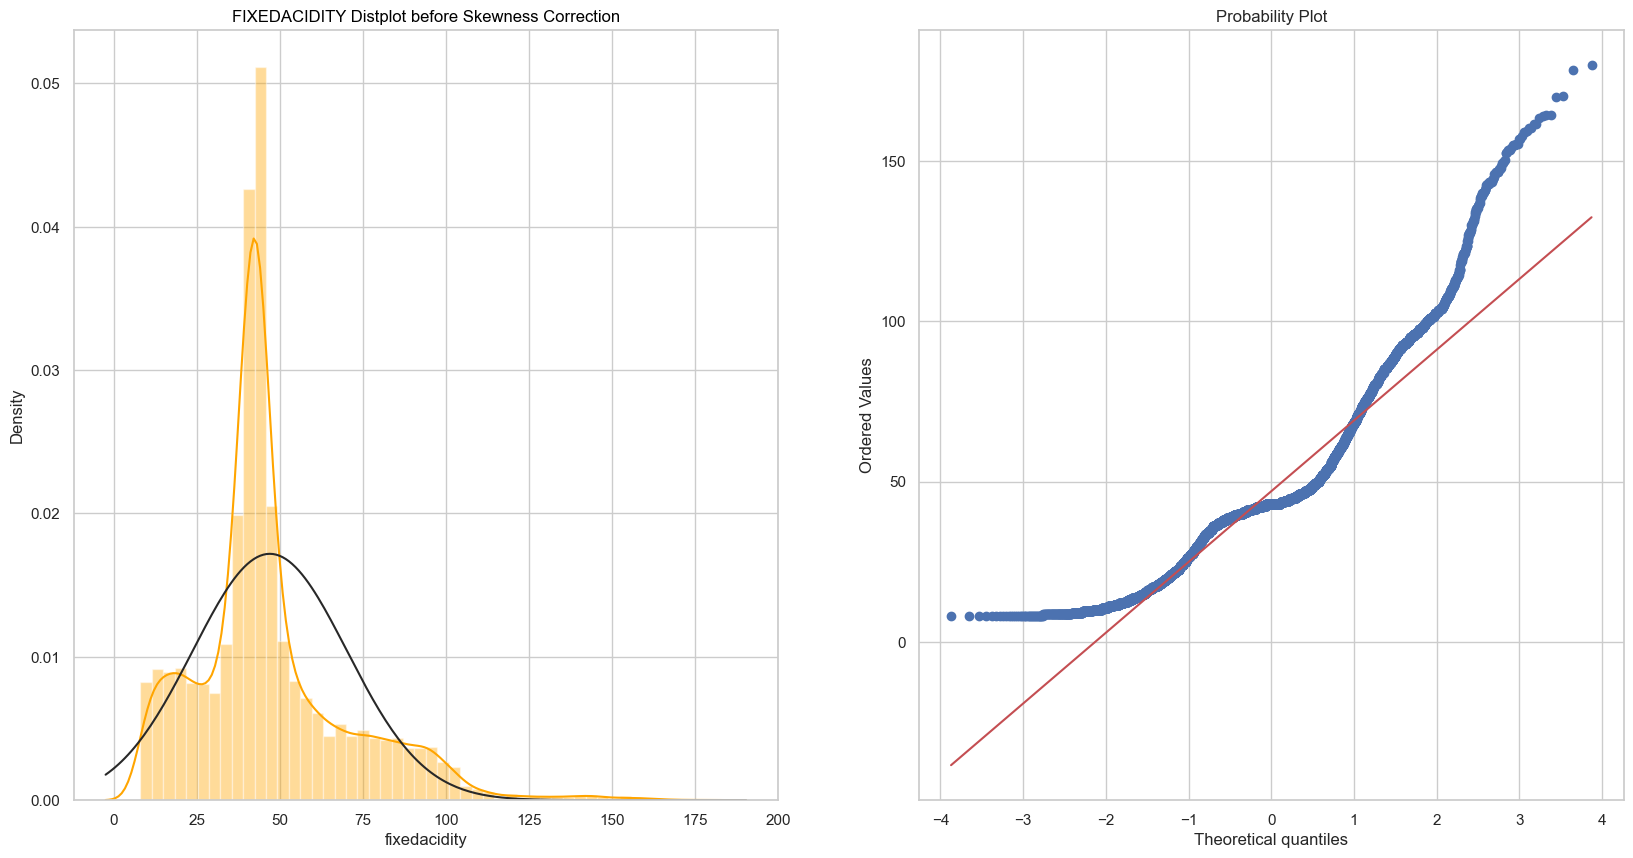

Before Correcting
Mu before correcting VOLATILEACIDITY: 0.9836878744280342, Sigma before correcting VOLATILEACIDITY: 0.28972615882187824


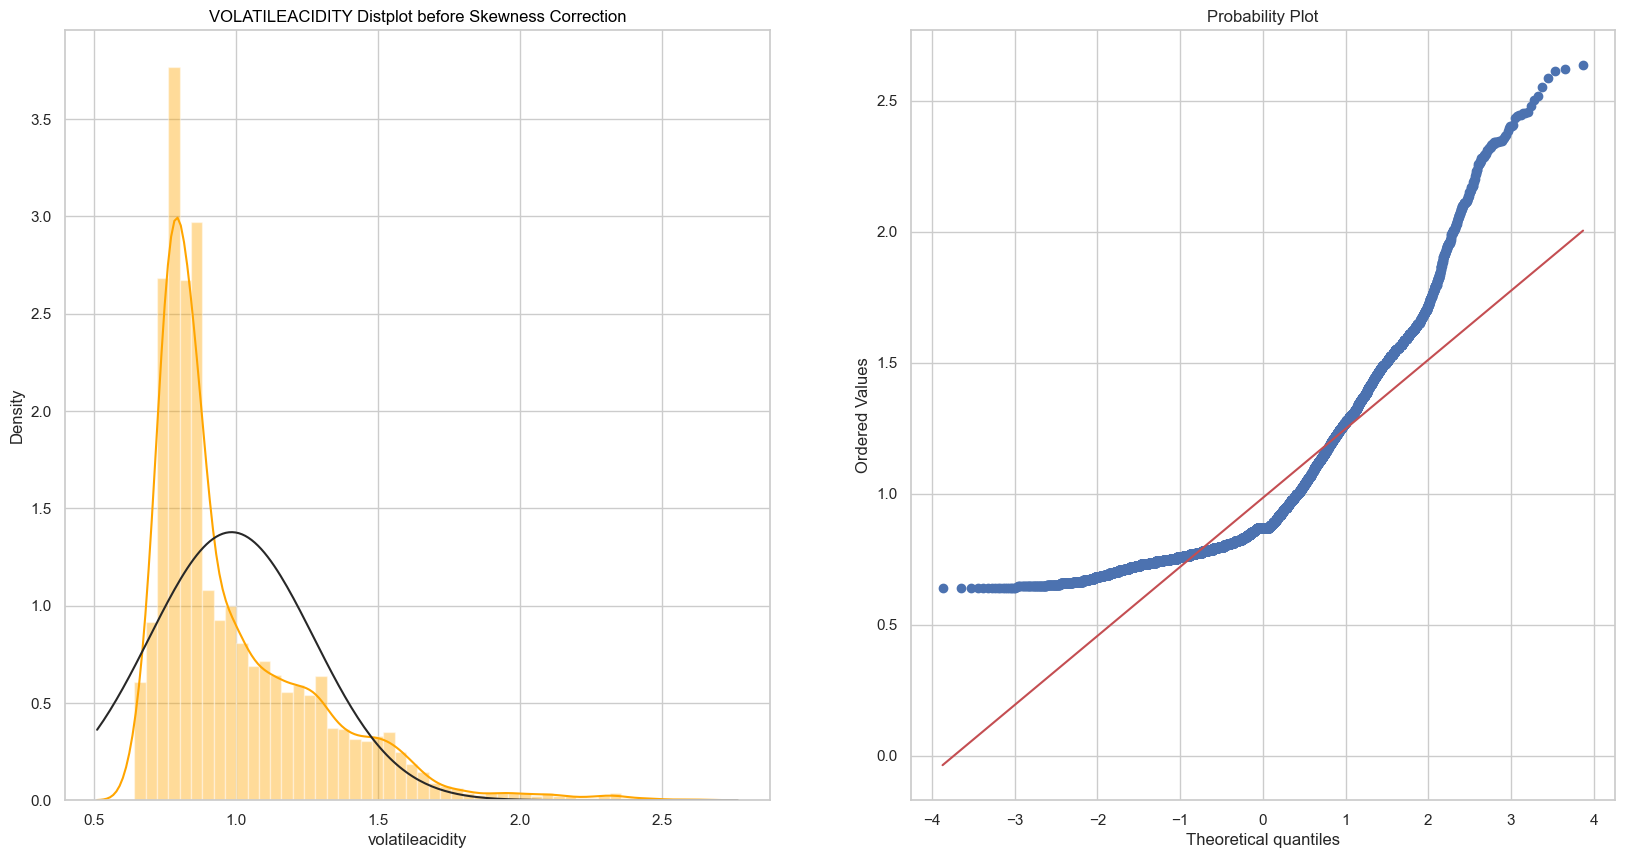

Before Correcting
Mu before correcting CITRICACID: 1.0851232734618739, Sigma before correcting CITRICACID: 0.34447410981927473


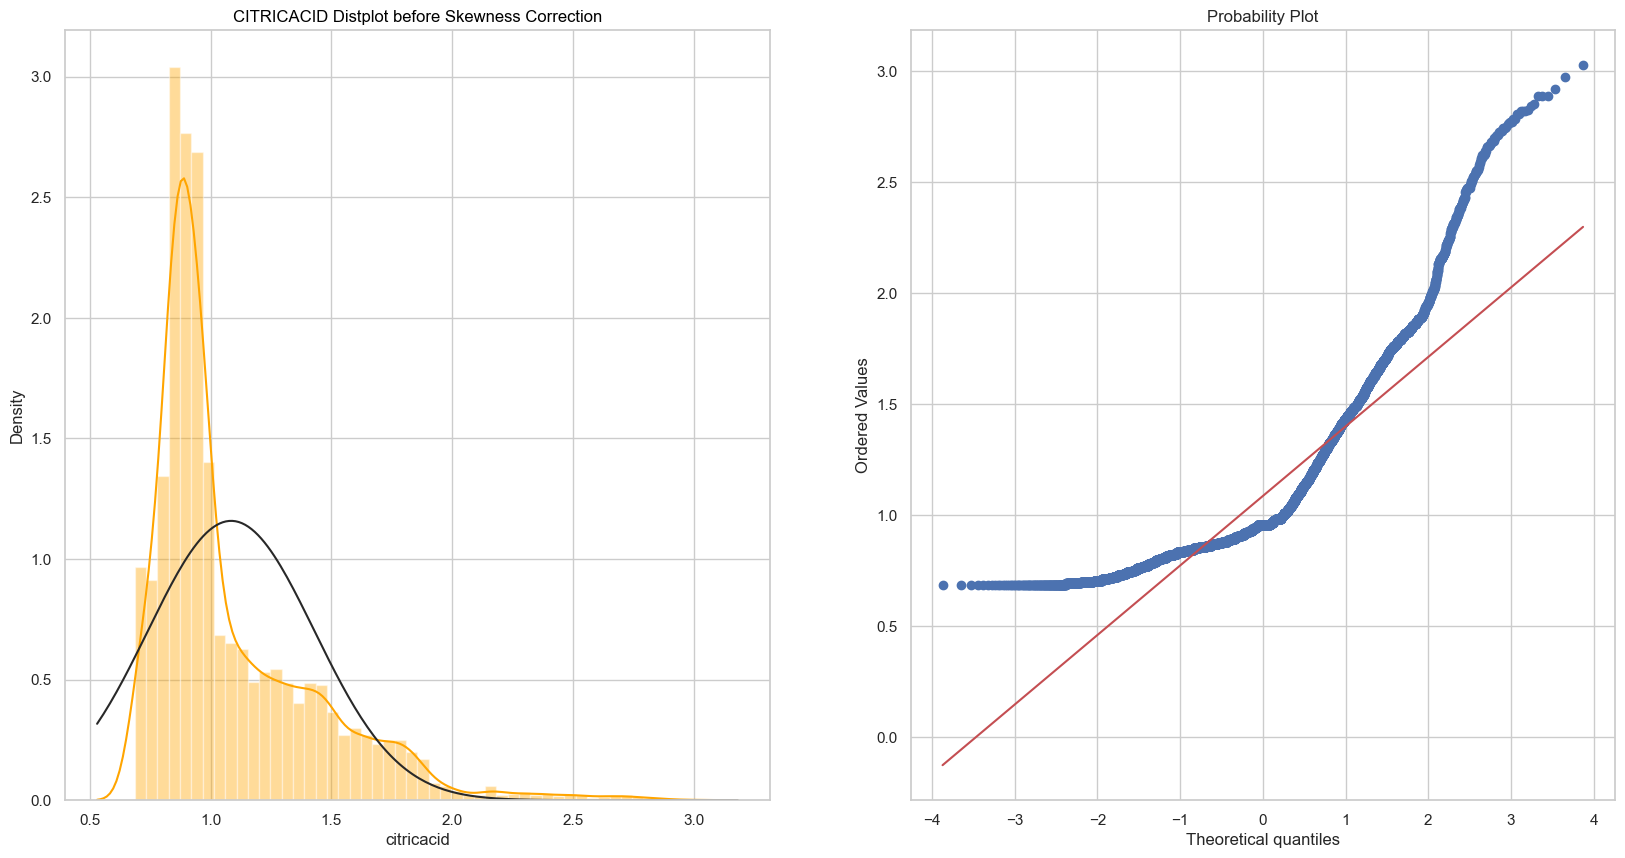

Before Correcting
Mu before correcting RESIDUALSUGAR: 581.2030049049658, Sigma before correcting RESIDUALSUGAR: 579.95463661885


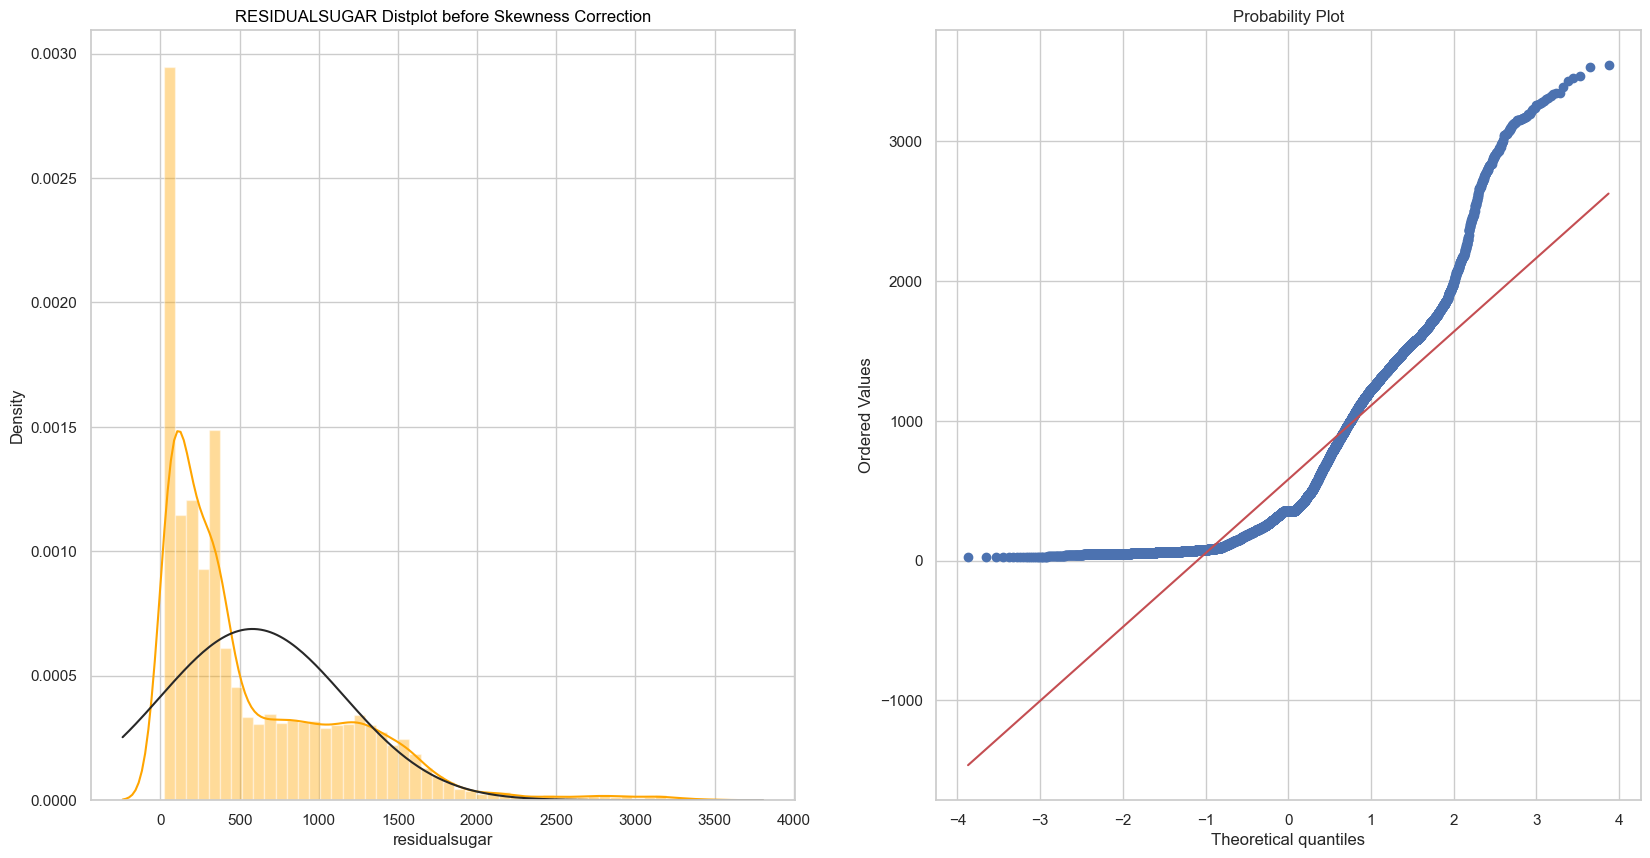

Before Correcting
Mu before correcting CHLORIDES: 0.2716455514132981, Sigma before correcting CHLORIDES: 0.05035819881541216


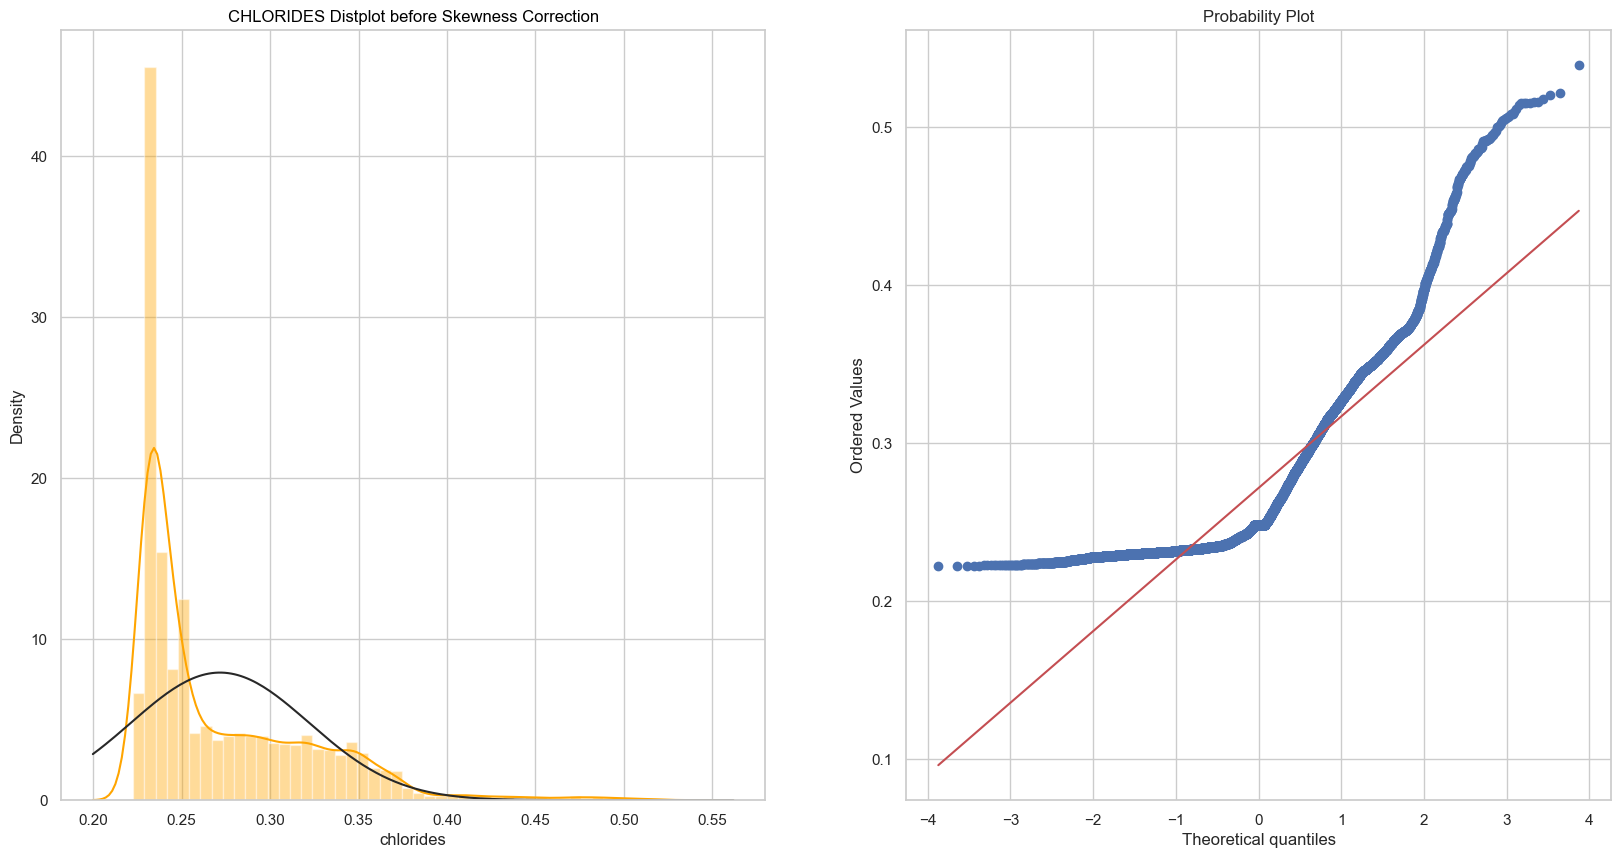

Before Correcting
Mu before correcting FREESULFURDIOXIDE: 11130.017566832834, Sigma before correcting FREESULFURDIOXIDE: 10772.136262439877


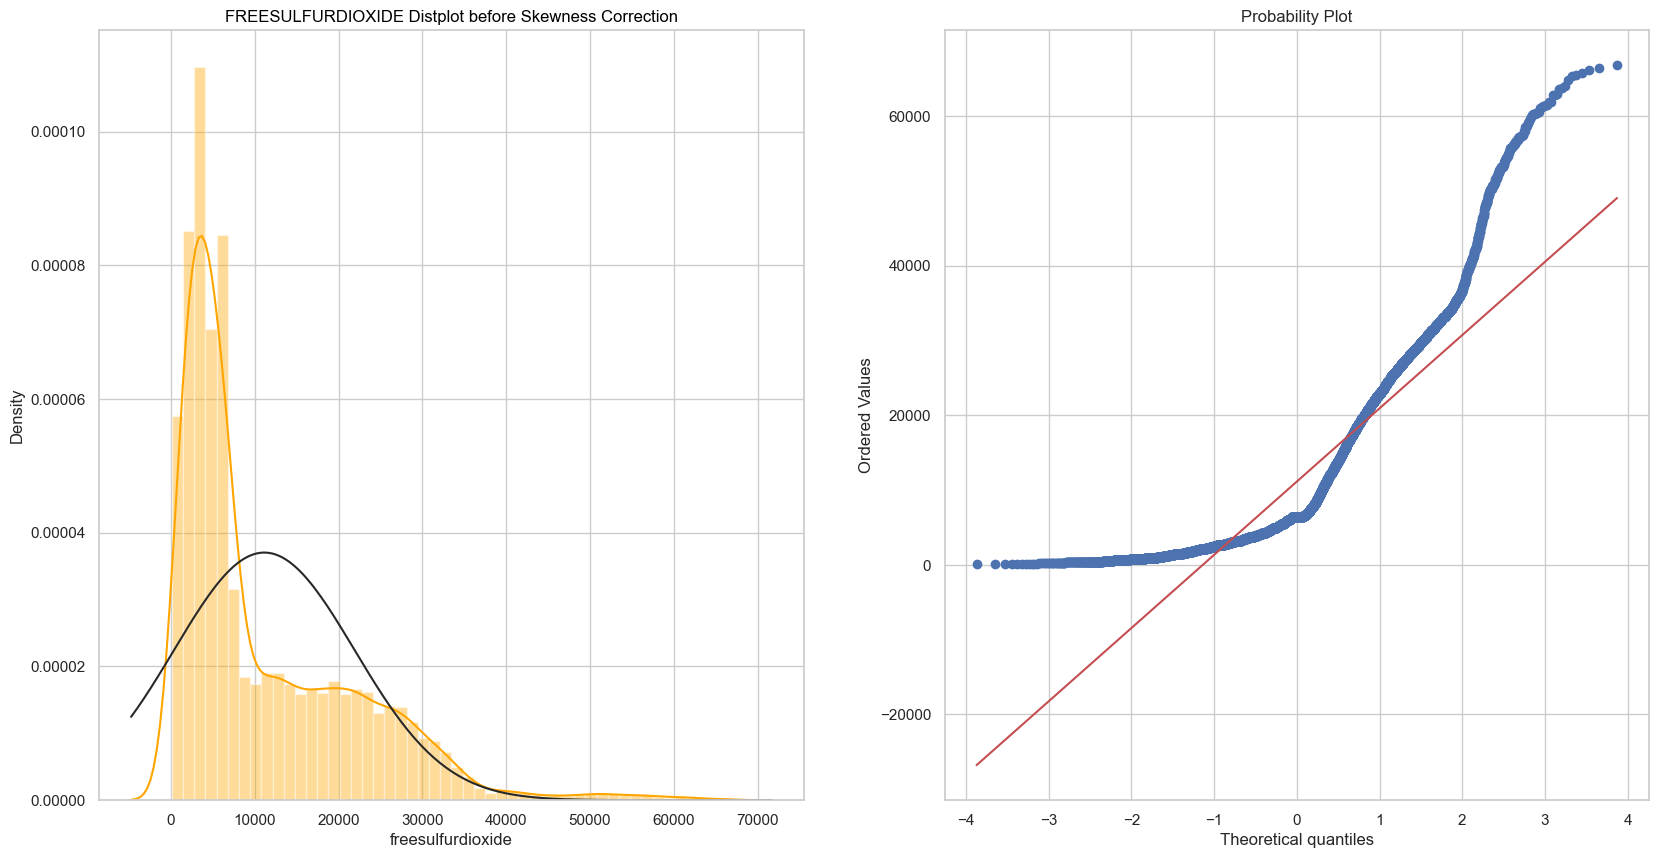

Before Correcting
Mu before correcting TOTALSULFURDIOXIDE: 32060.657283282915, Sigma before correcting TOTALSULFURDIOXIDE: 24114.750856459716


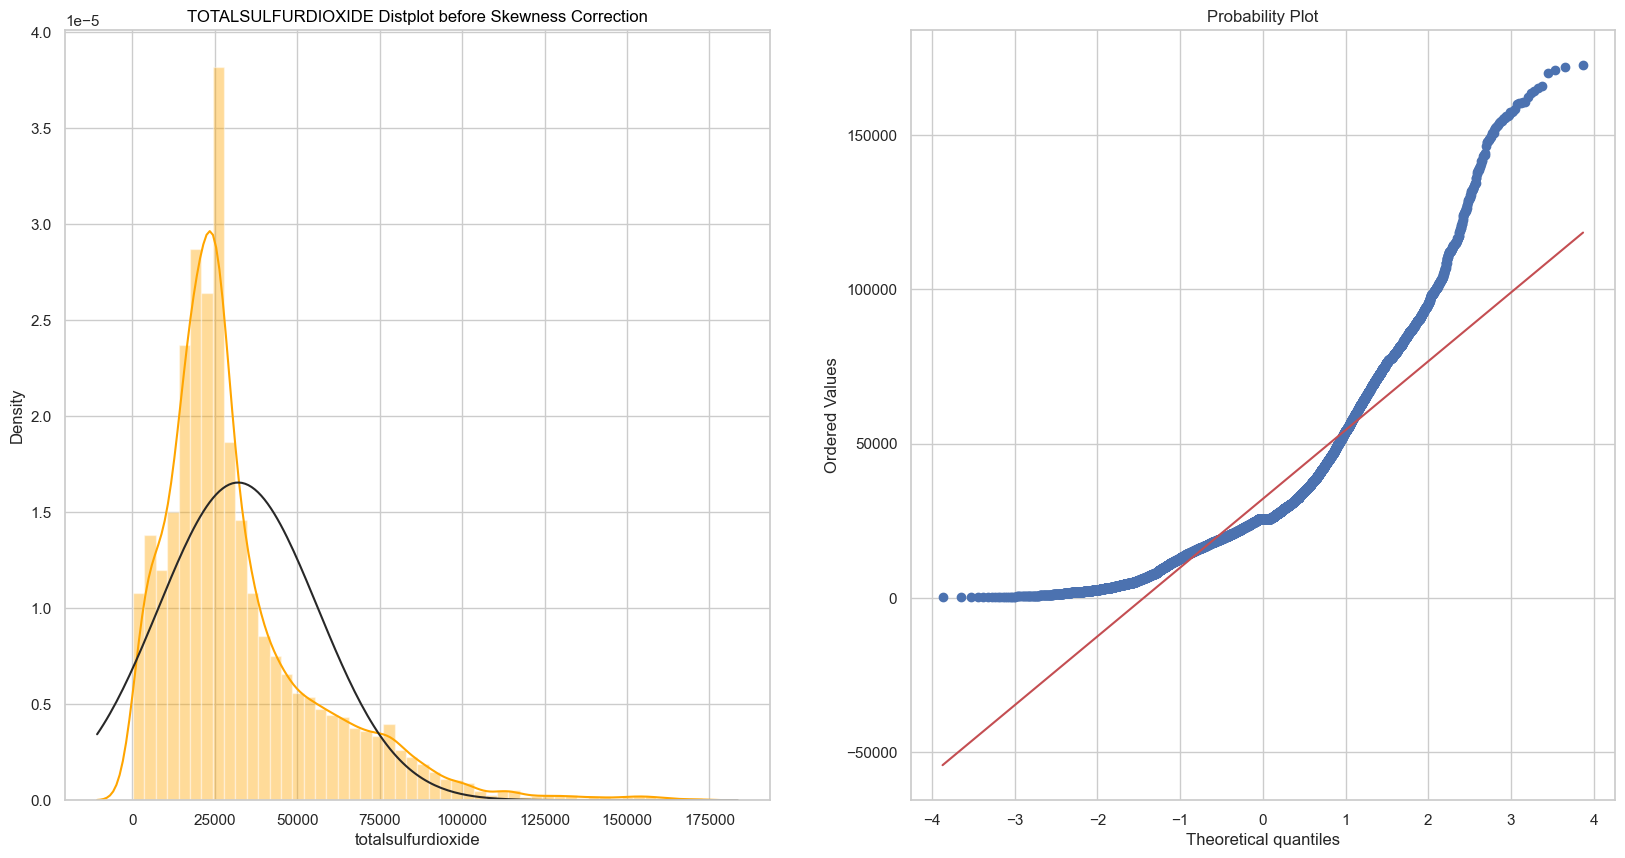

Before Correcting
Mu before correcting DENSITY: 1.020585486474118, Sigma before correcting DENSITY: 0.0007041915864641885


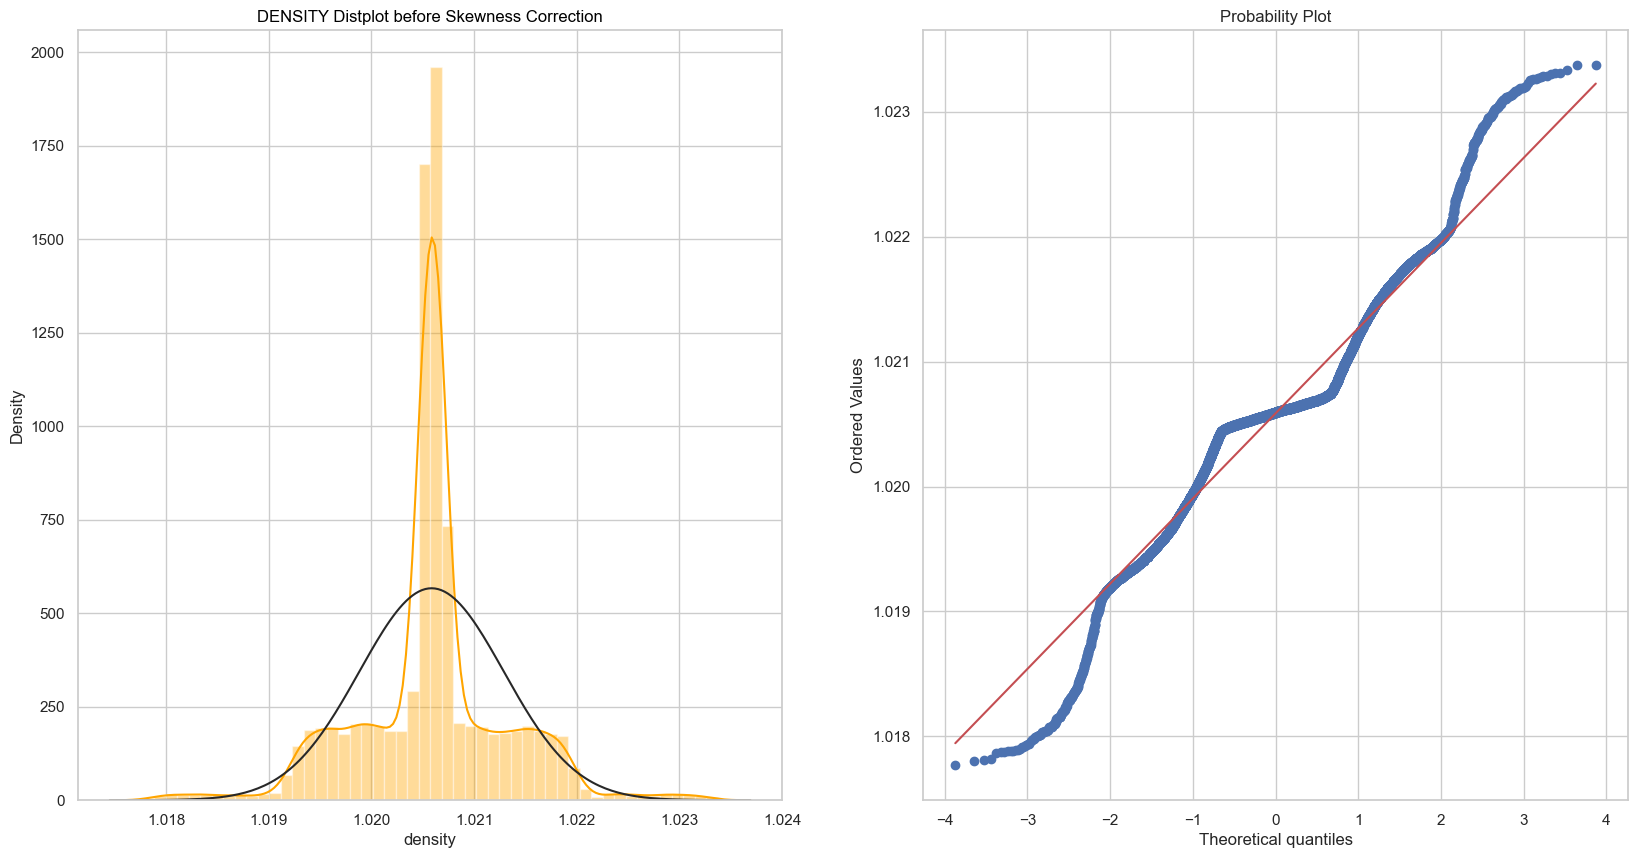

Before Correcting
Mu before correcting PH: 5.389811543798805, Sigma before correcting PH: 0.4582259901934289


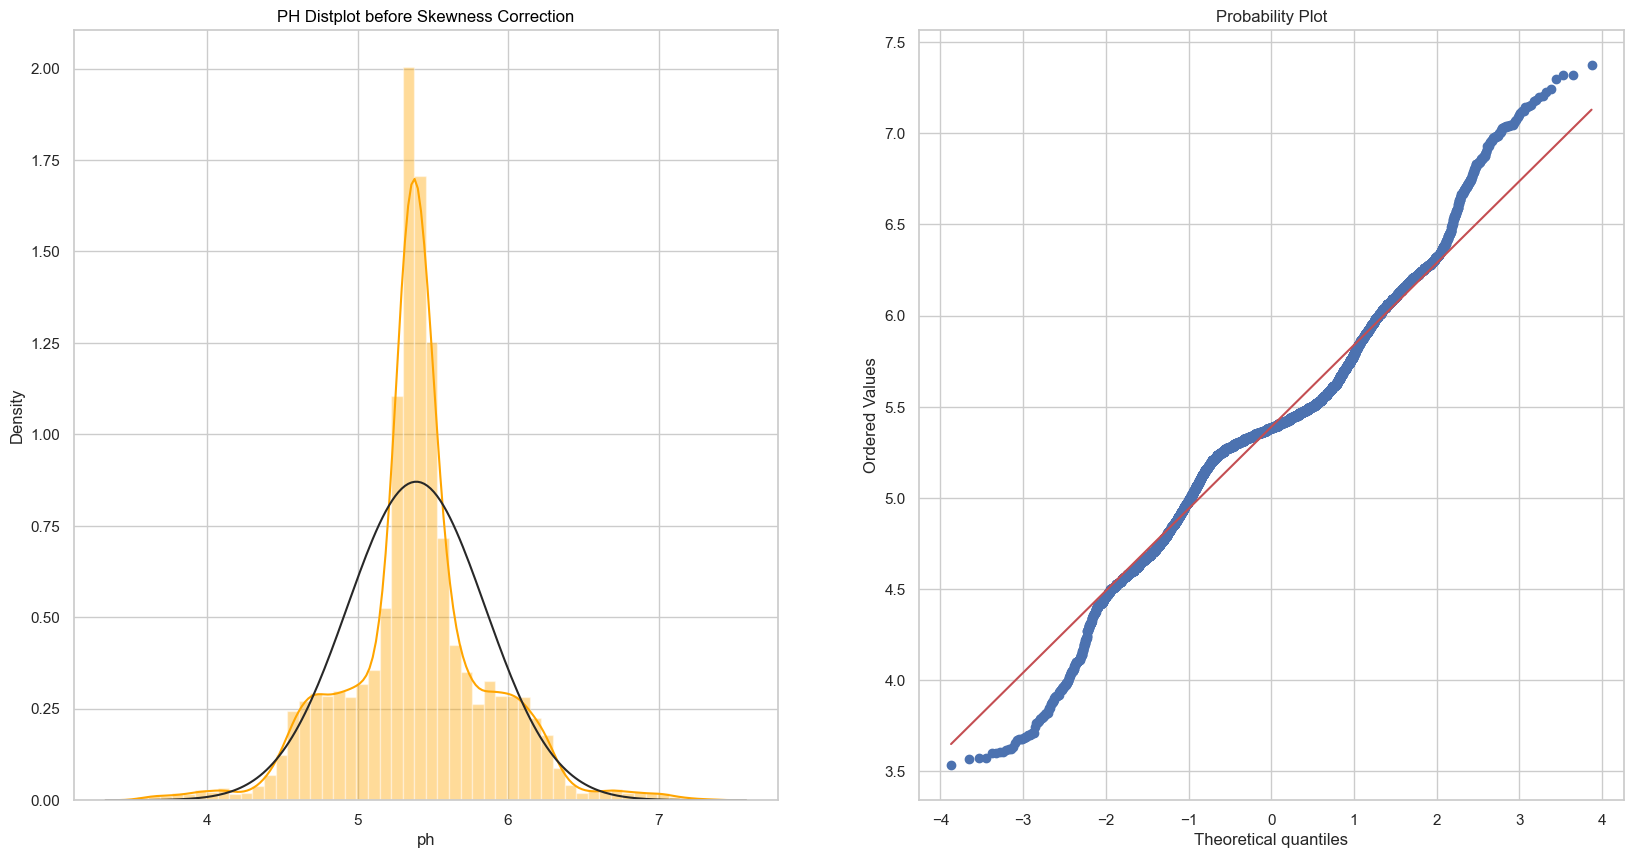

Before Correcting
Mu before correcting SULPHATES: 1.375488500668447, Sigma before correcting SULPHATES: 0.38061692593627766


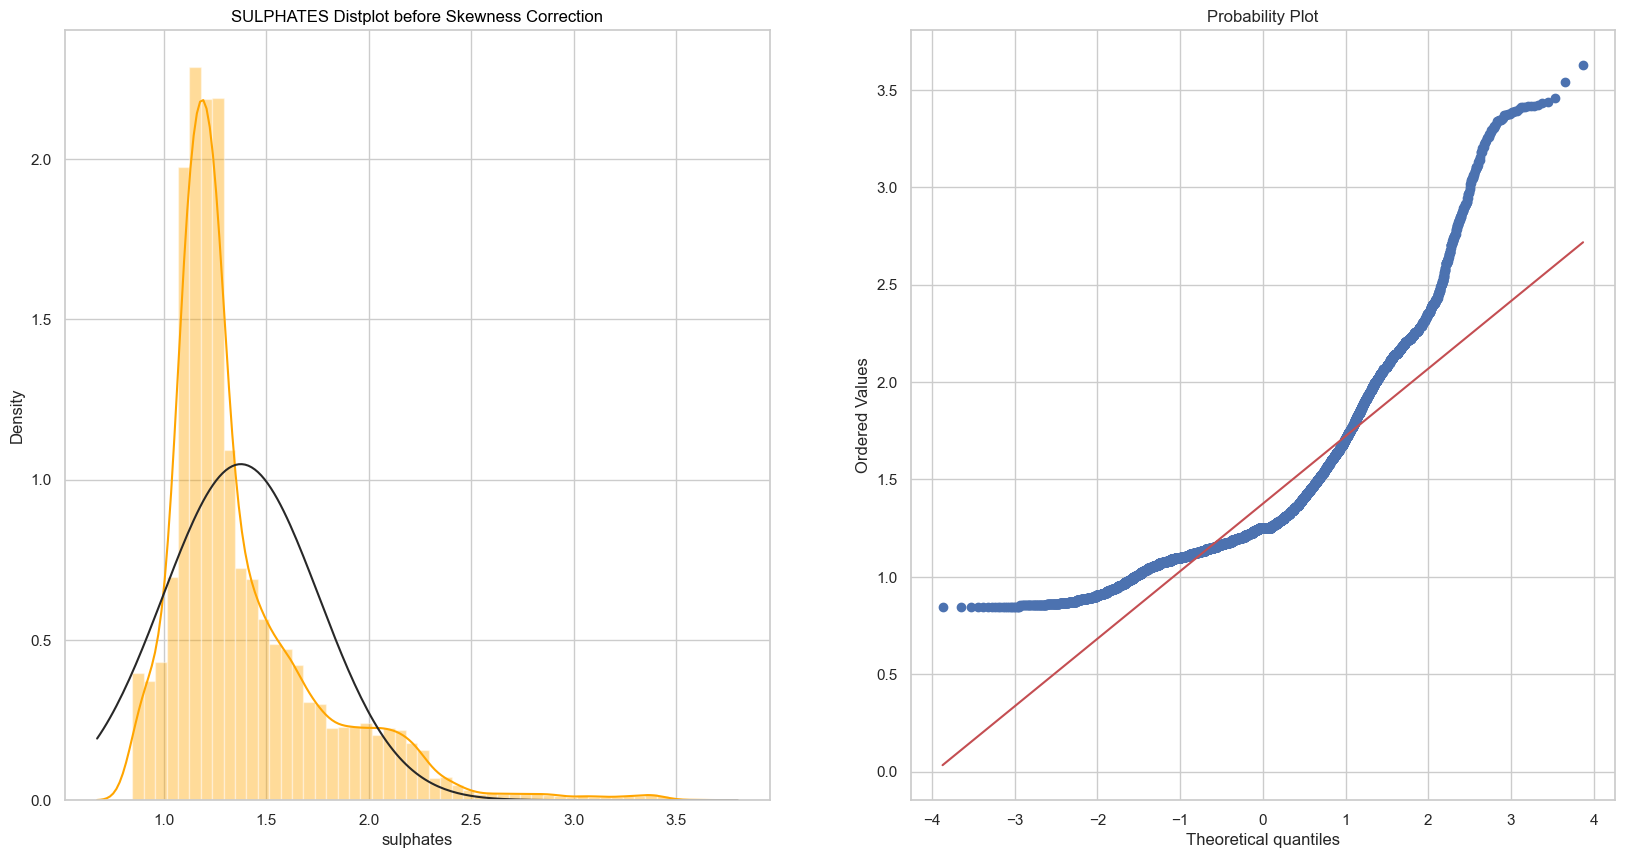

Before Correcting
Mu before correcting ALCOHOL: 48.79193607223865, Sigma before correcting ALCOHOL: 12.959379329027248


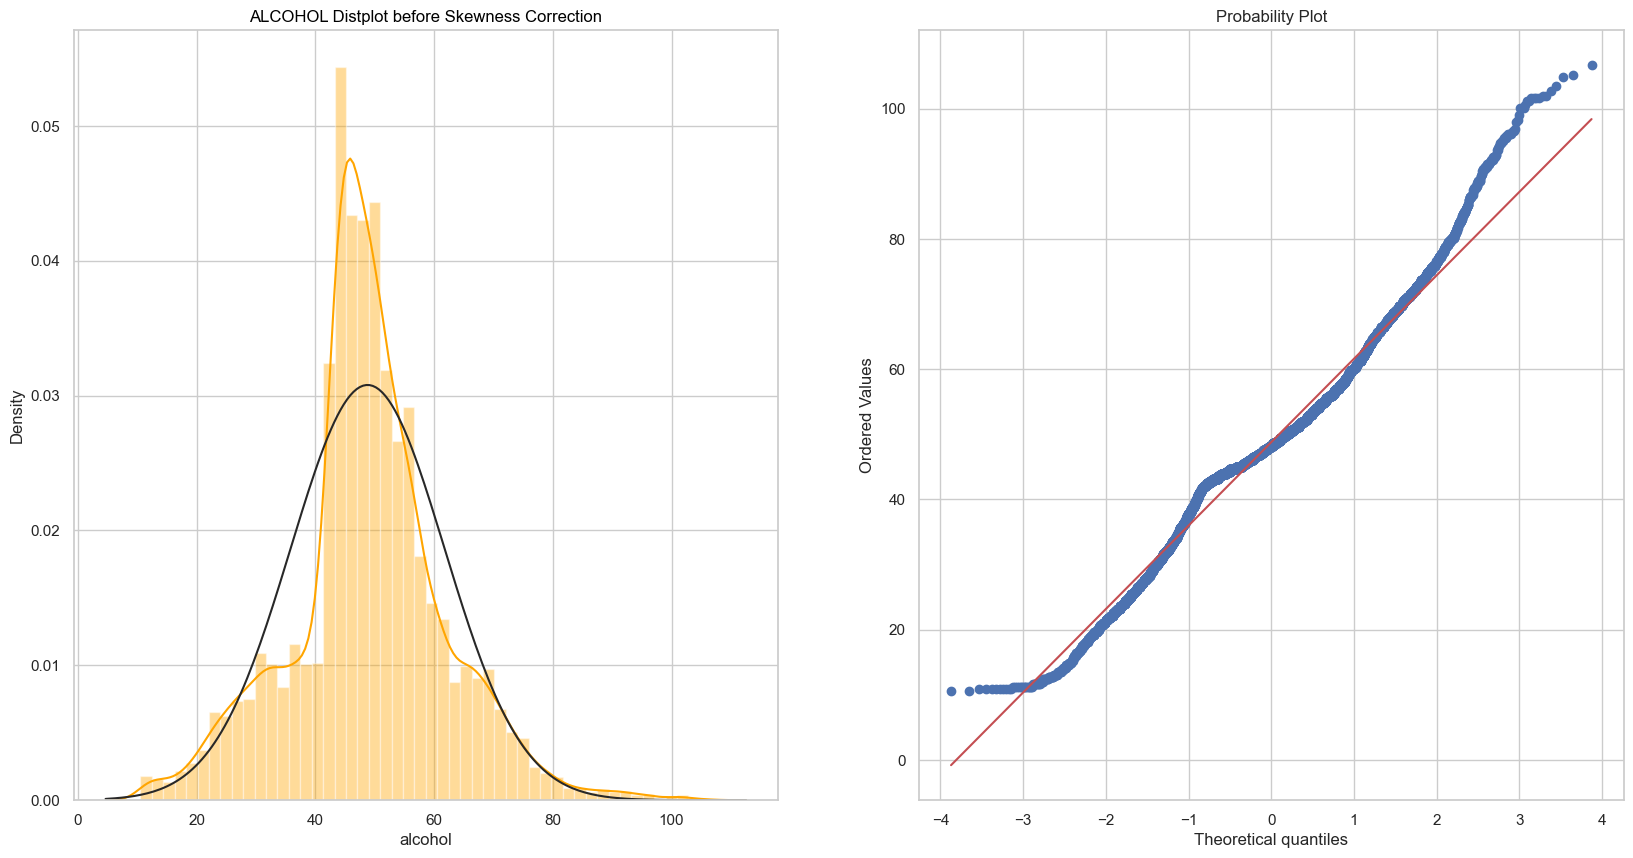

In [24]:
# List of columns to check for skewnes
# Iterate over the columns in the skewness list and call the check_skewness function
for column in columns_to_plot:
    check_skewness(column, df_without_outliers)

From histogram with KDE plot we can observe the data distribution, skewness. 

The mean fixed acidity (Mu) is 46.36, indicating the central tendency (mean) of the fixed acidity values. The standard deviation (Sigma) is 22.82, suggesting the degree of variability or dispersion in the fixed acidity data.

Probability plot explanation:
- The x-axis represents the quantiles of the theoretical distribution (e.g., normal distribution).
- The y-axis represents the quantiles of the observed or empirical distribution.
- In an ideal scenario, if the data perfectly follows the chosen theoretical distribution, the points on the probability plot would fall along a straight line (45-degree line).
- Points above the ideal line suggest that the data's tail is heavier than expected by the theoretical distribution.
- Points below the ideal line suggest that the data's tail is lighter than expected by the theoretical distribution.
- Our plot is S-shaped curve in the probability plot indicates that the data distribution has heavier tails than the theoretical distribution in the middle but lighter tails in the extremes.
- Probability plots are often used as diagnostic tools to assess the normality of a dataset. If the points deviate significantly from the ideal line, it may suggest departures from the assumed distribution.
- For a normal probability plot, the x-axis typically represents the expected z-scores (standard normal distribution quantiles), and the y-axis represents the ordered data values.
- In summary, a probability plot is a valuable tool for visually assessing the fit of a dataset to a theoretical distribution. It provides insights into deviations from the expected distribution and helps researchers or analysts make informed decisions about the statistical characteristics of the data.

## Correcting Skewness Using Box-Cox Transformation

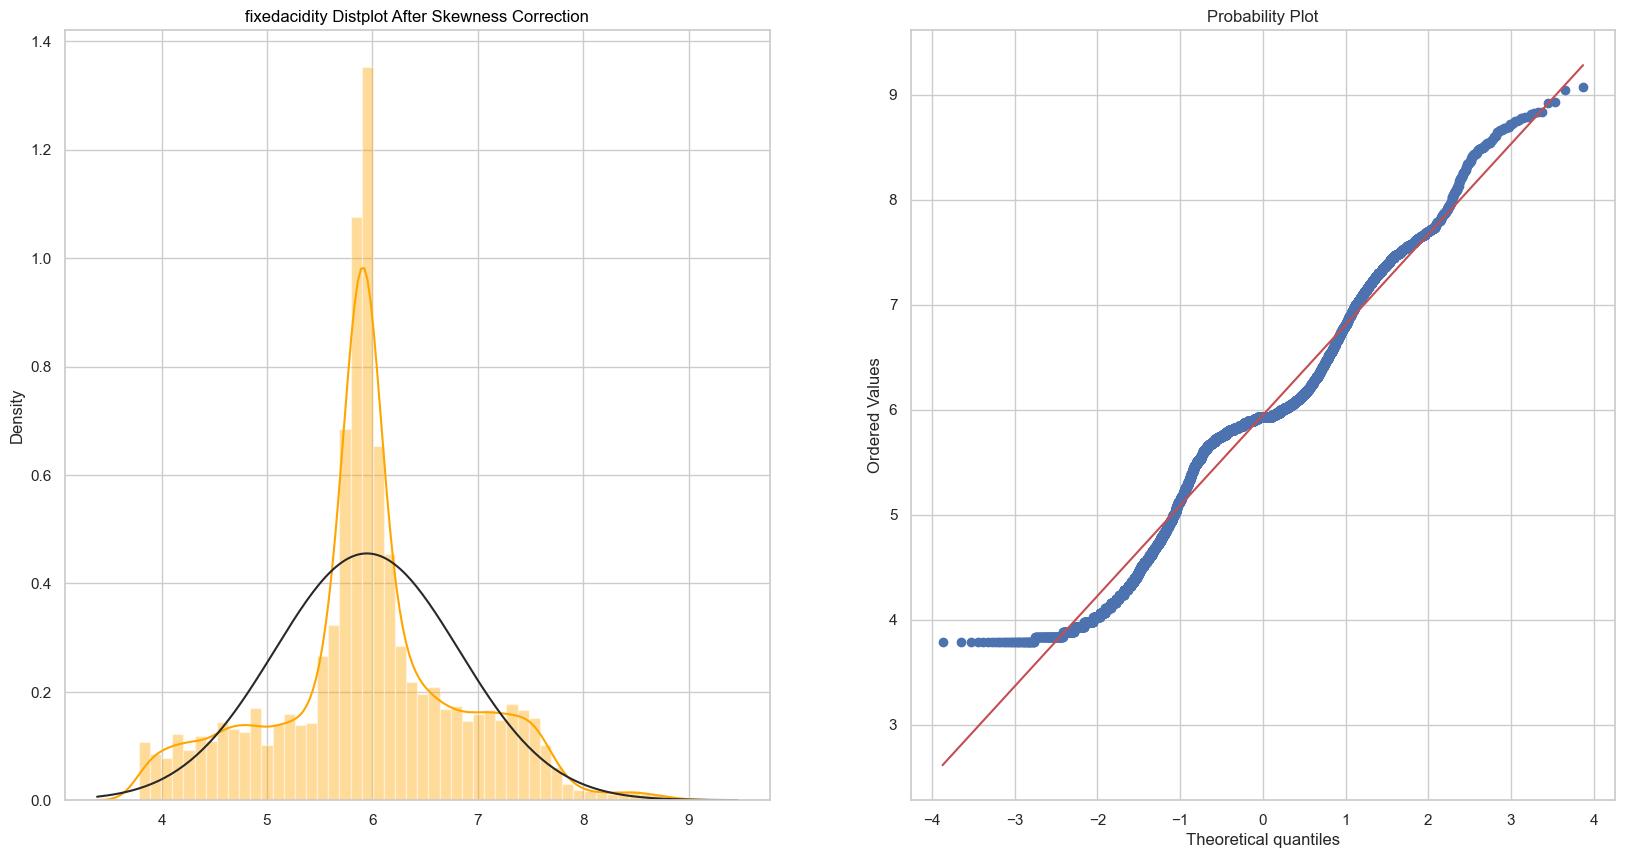

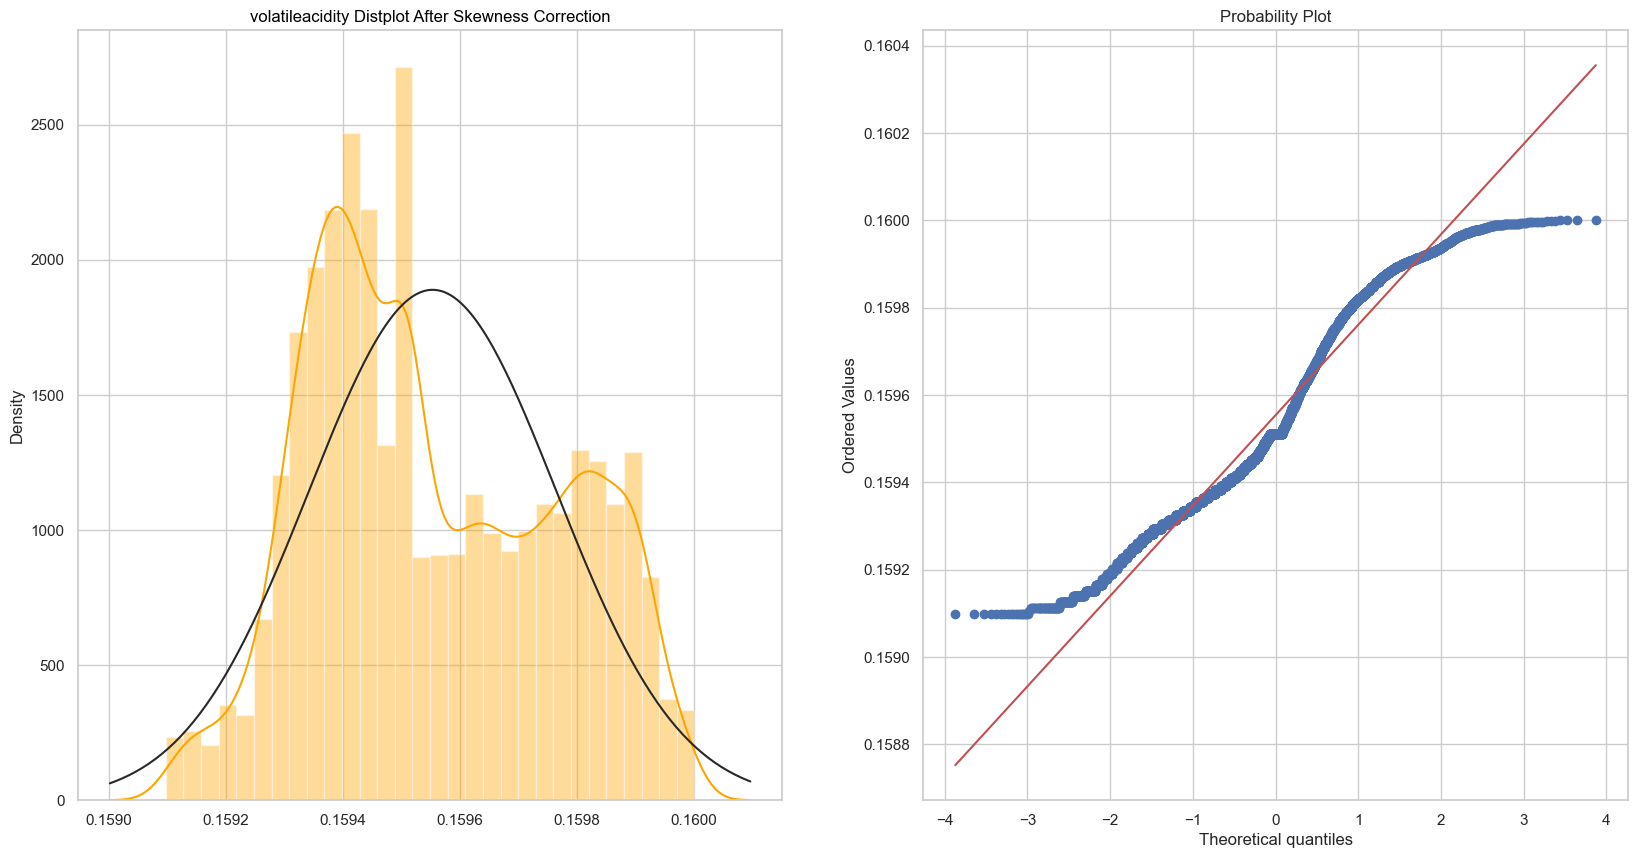

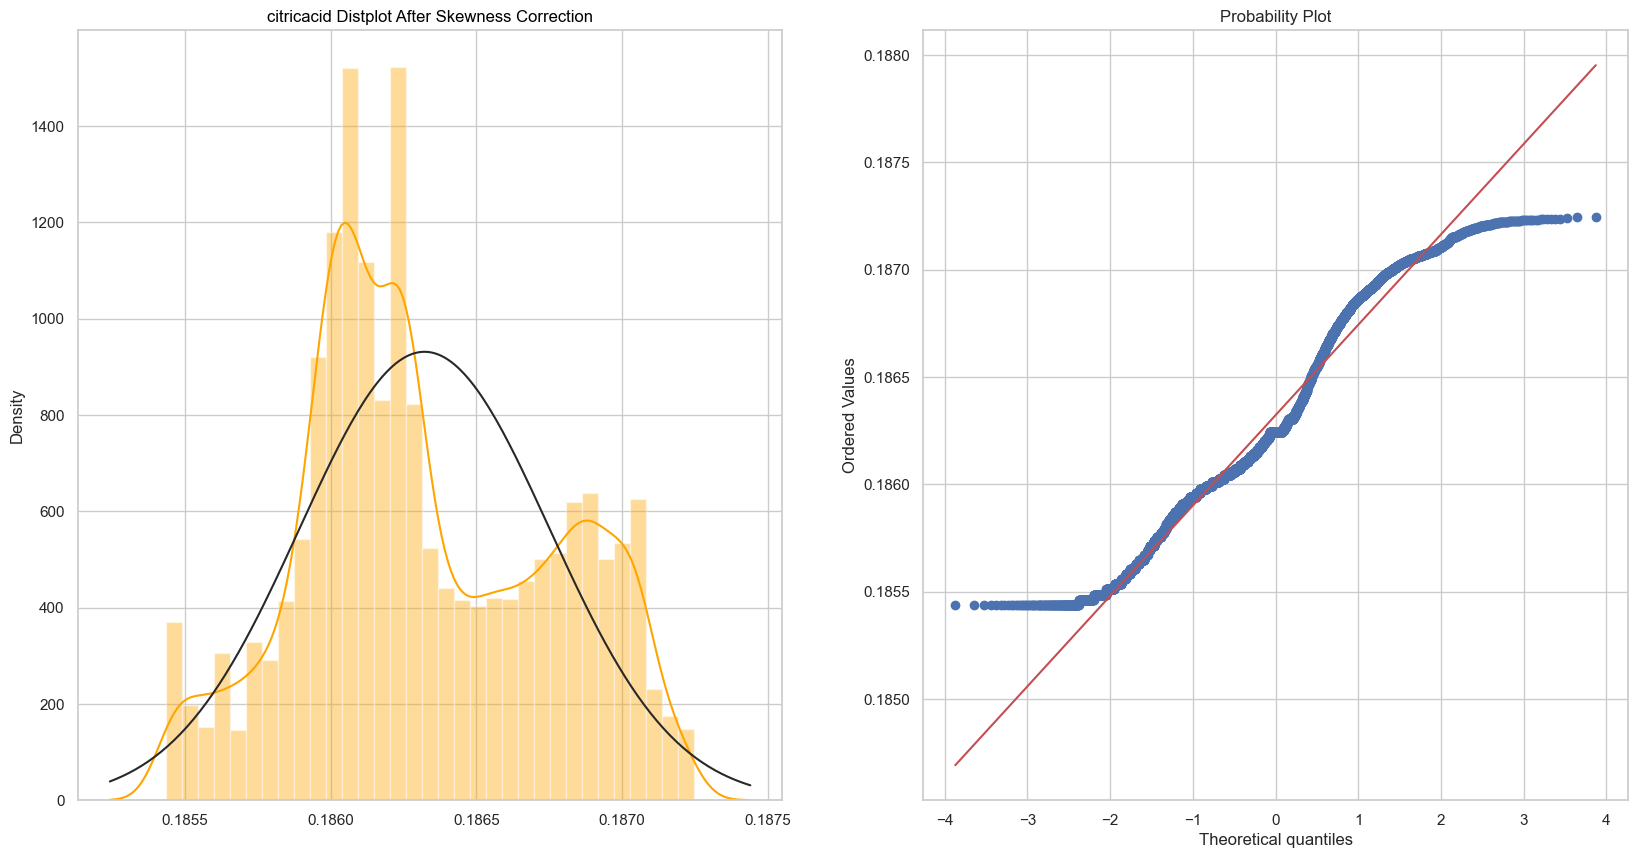

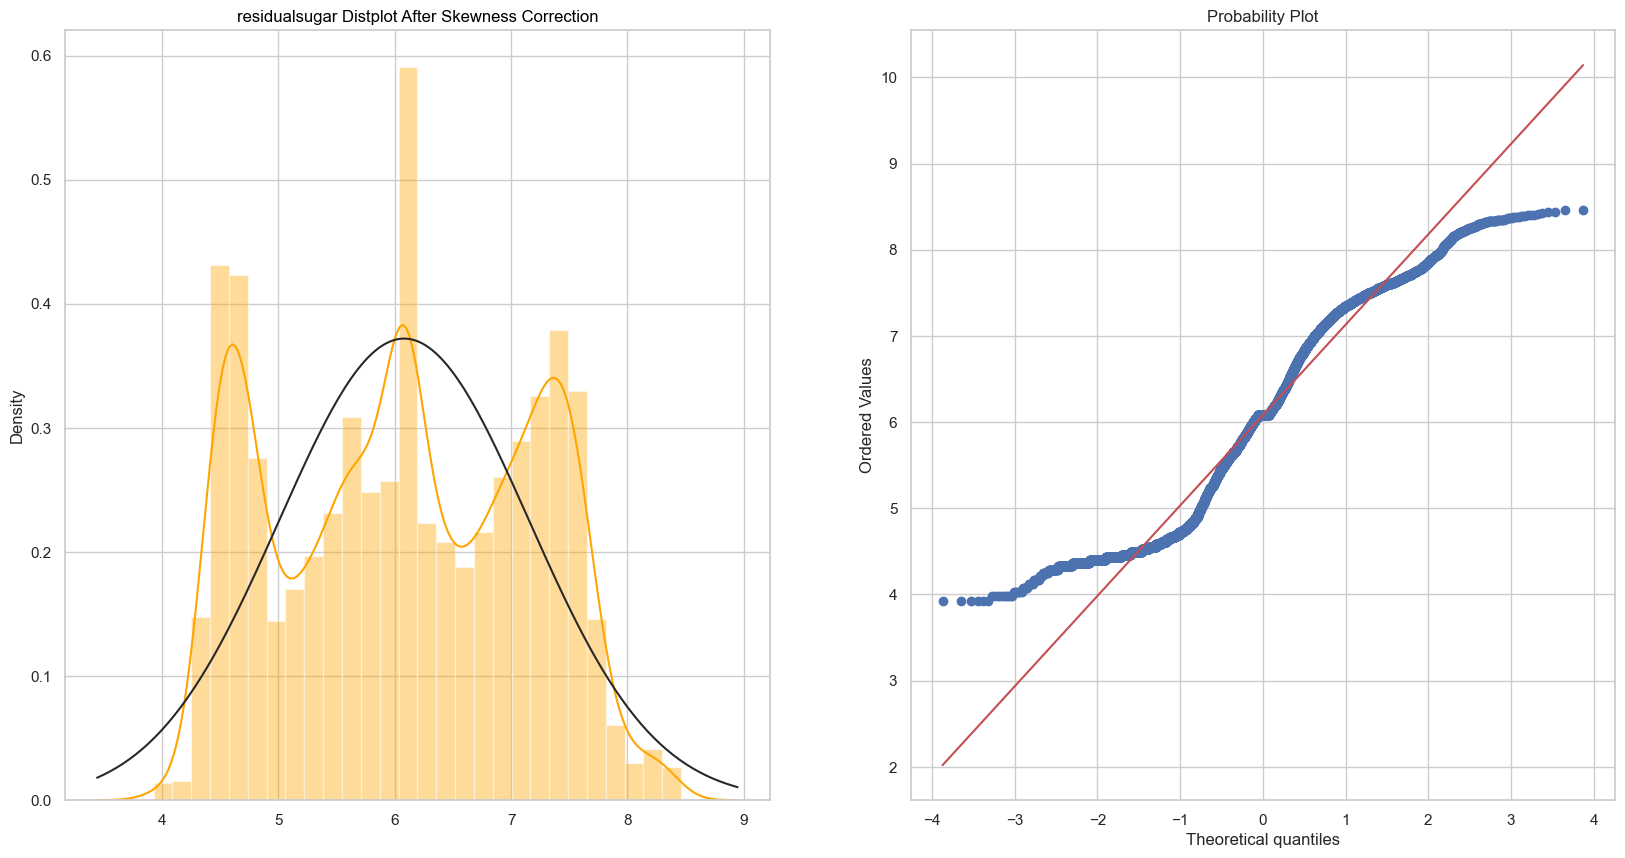

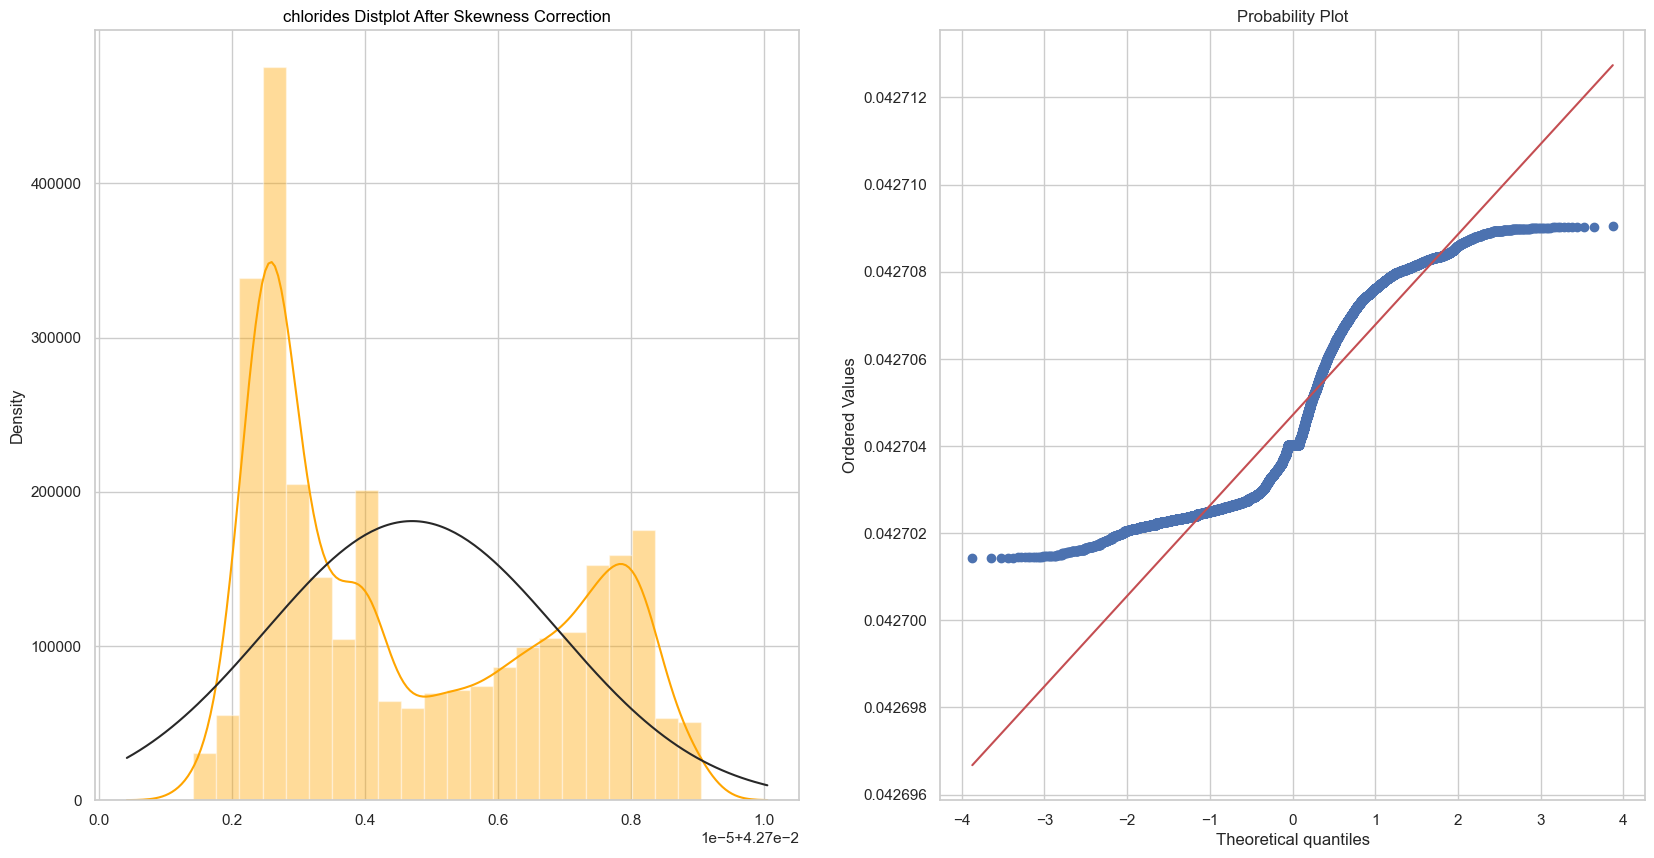

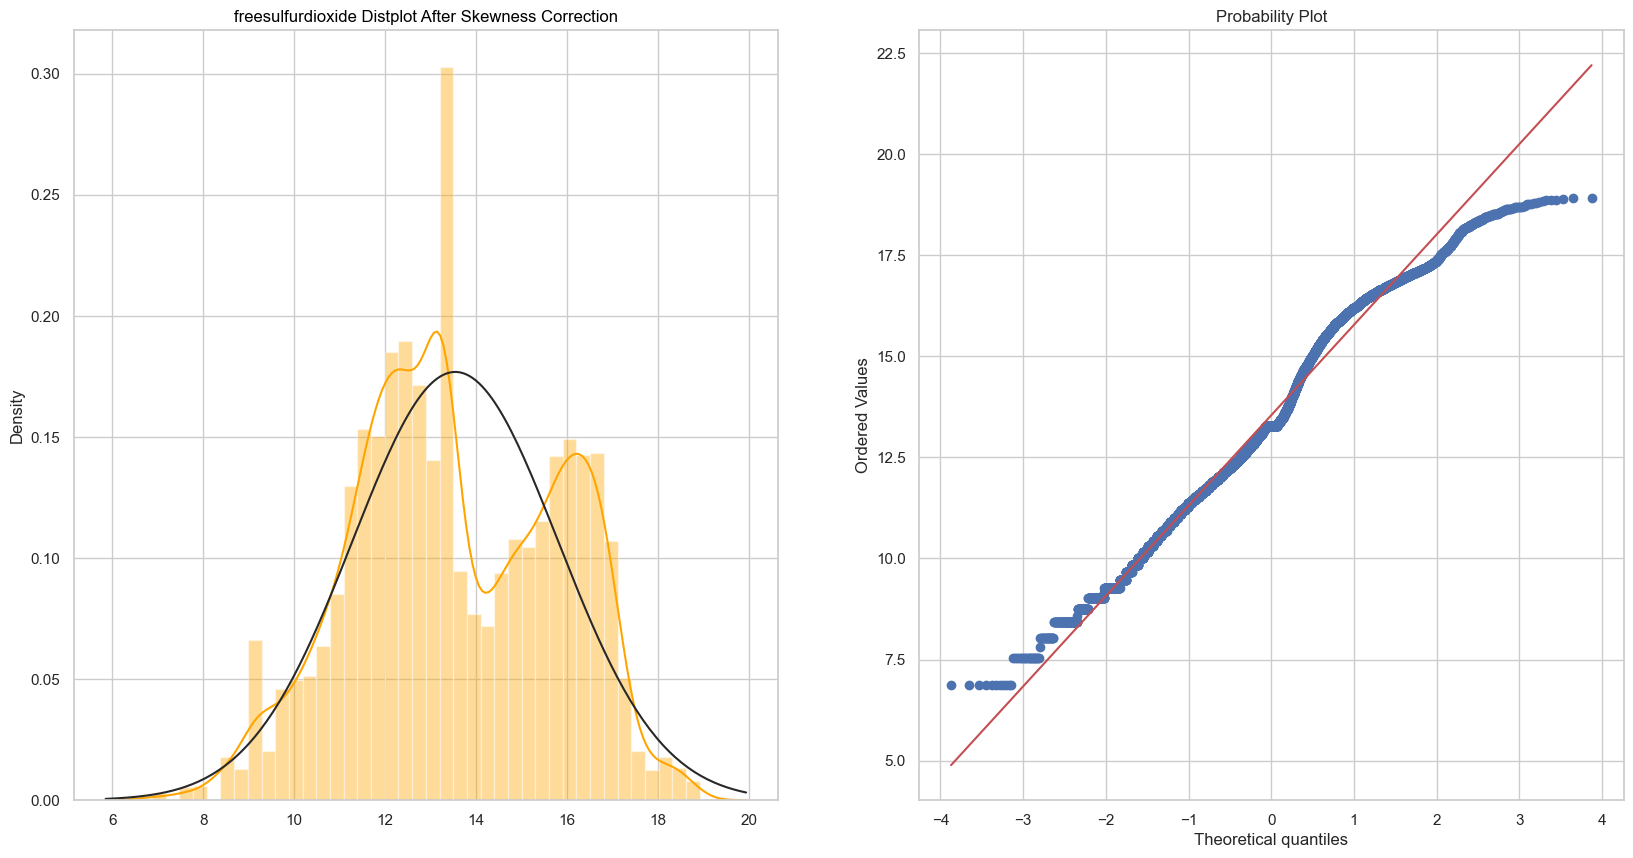

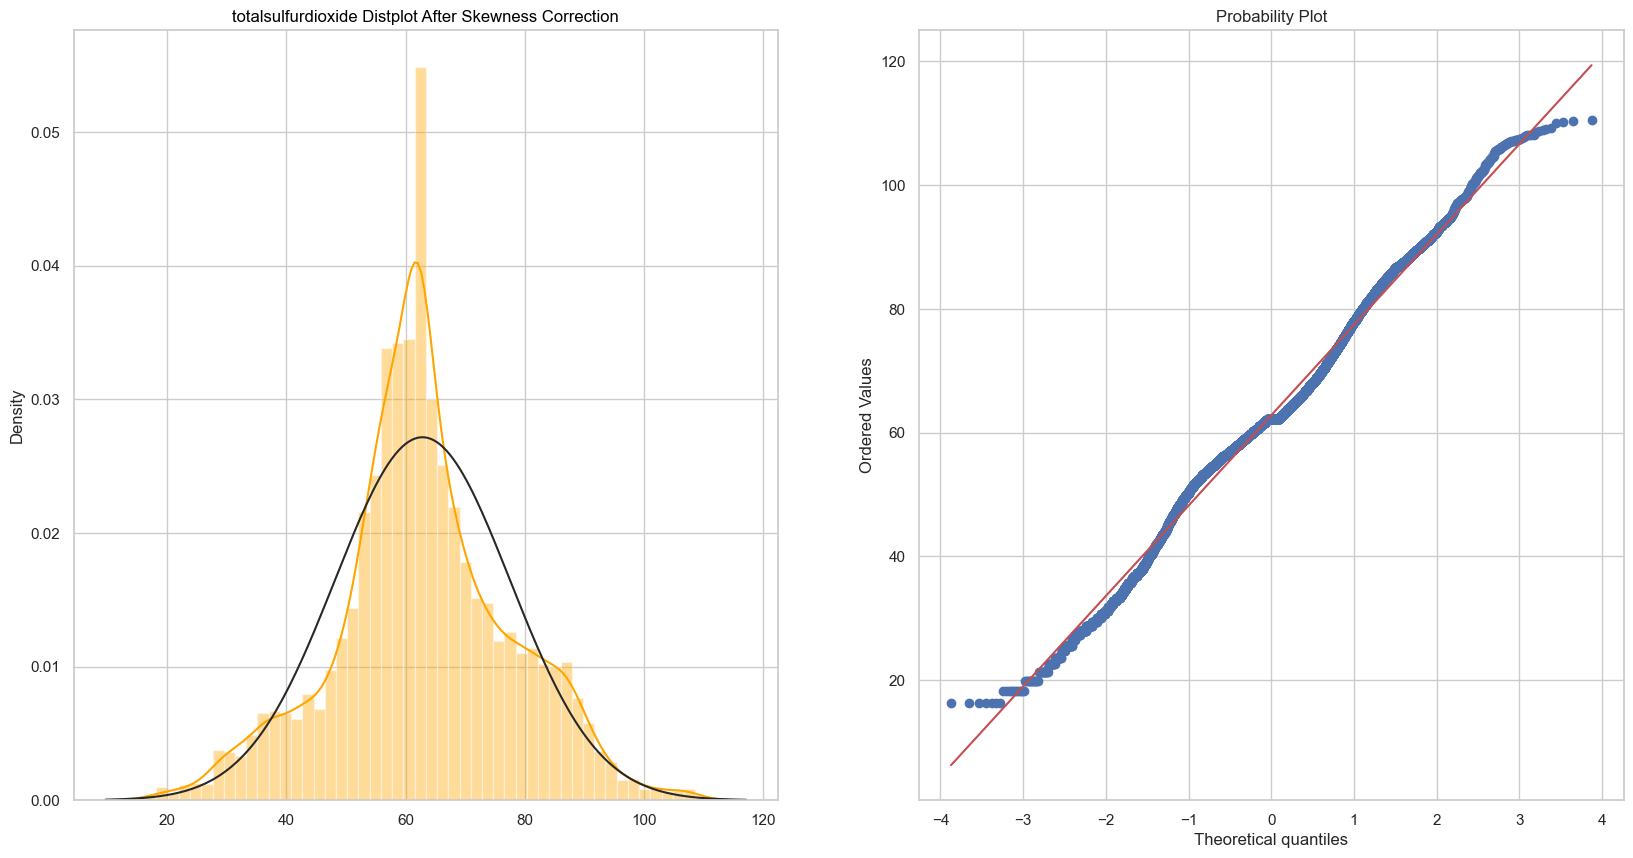

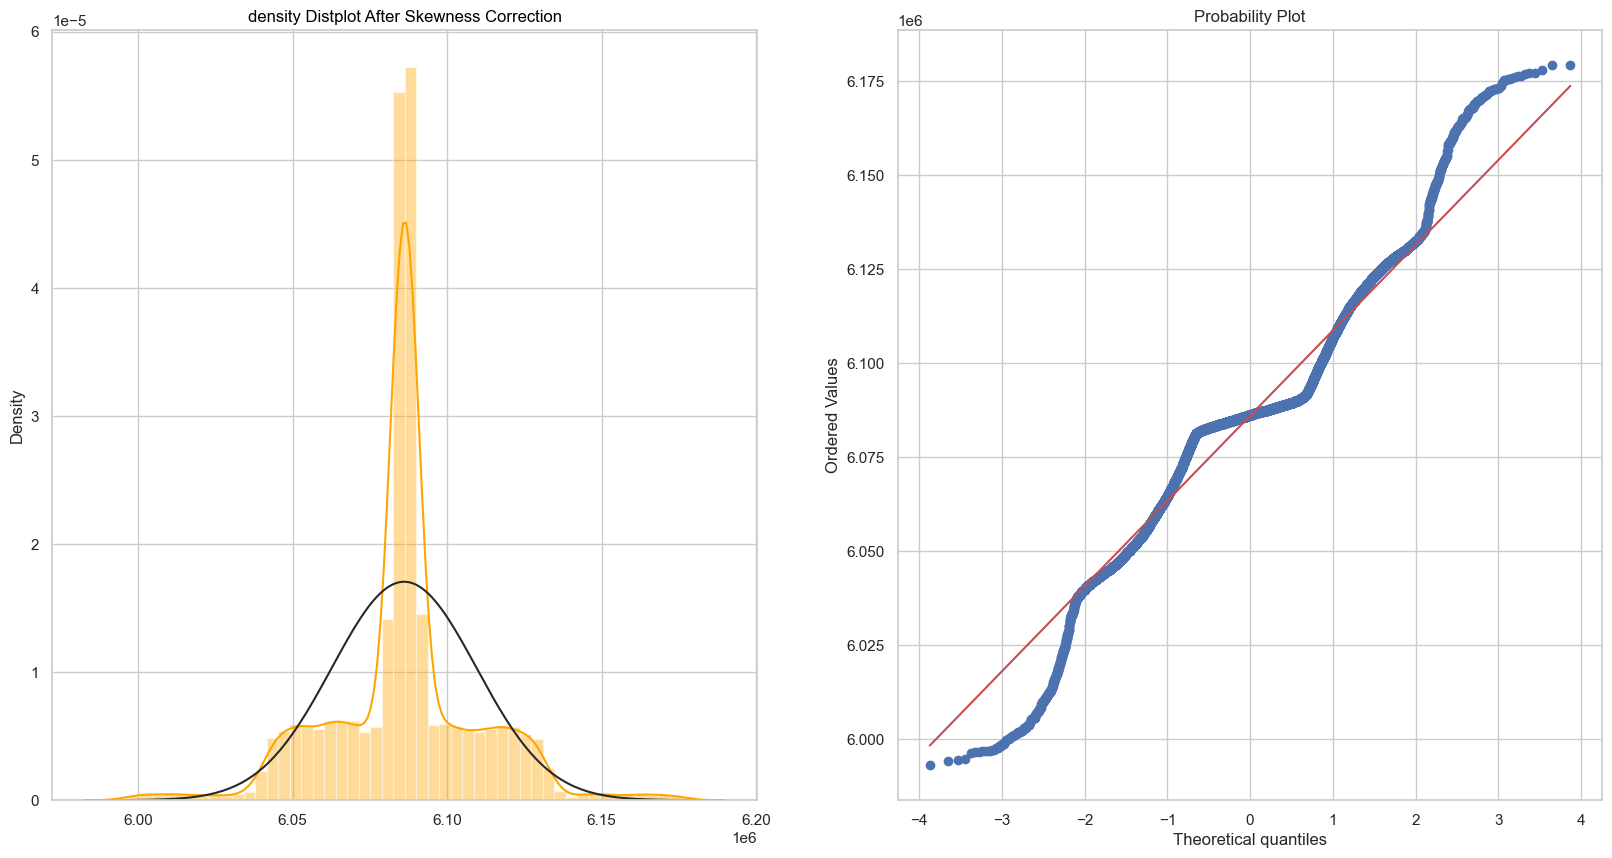

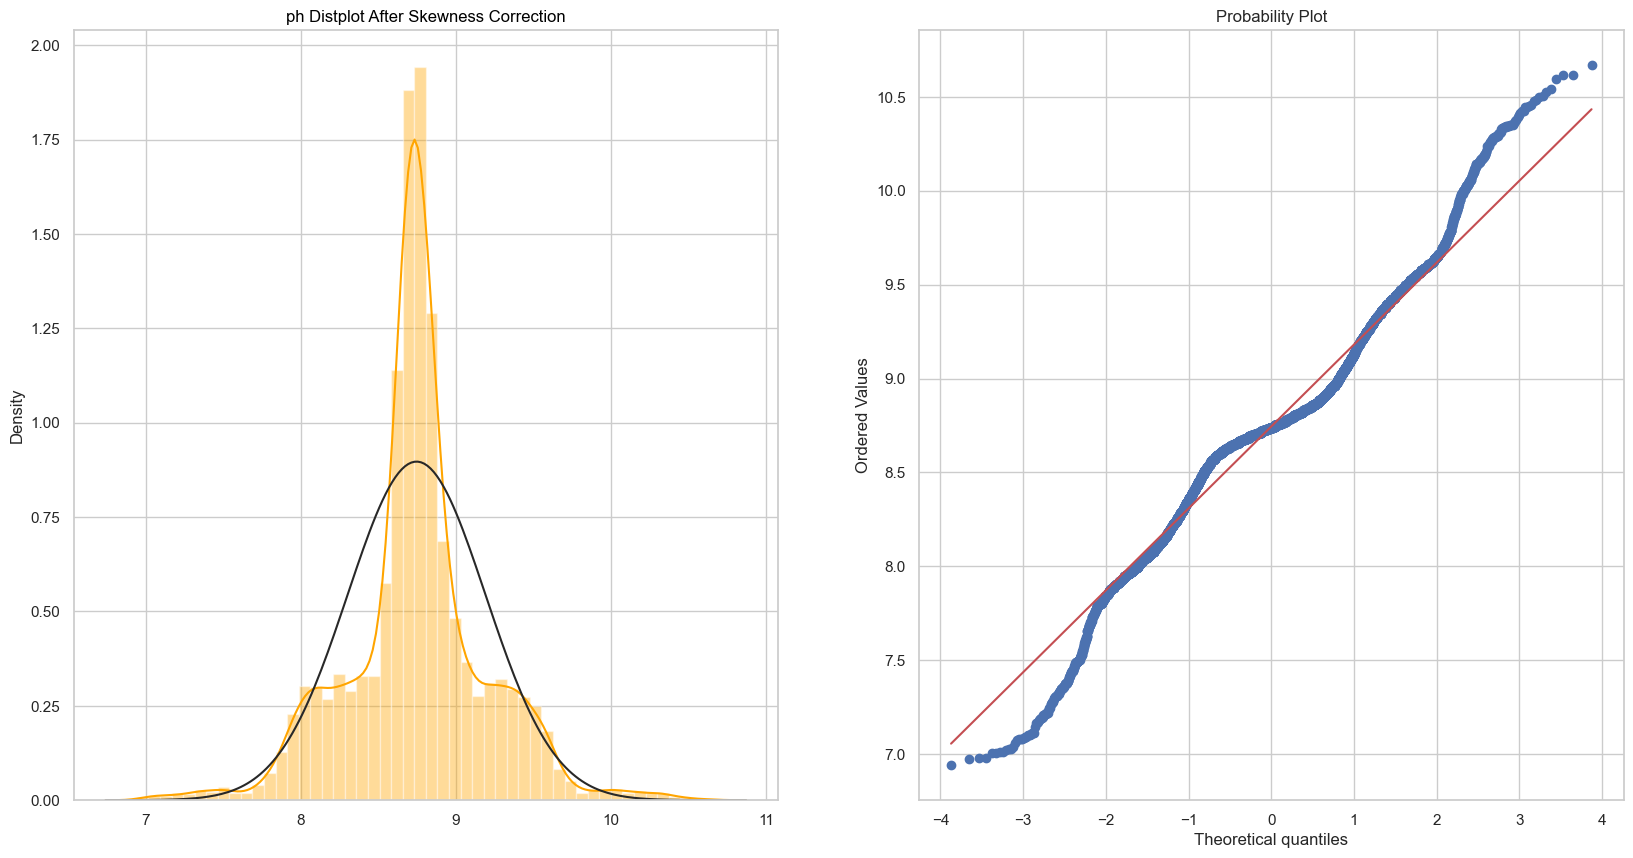

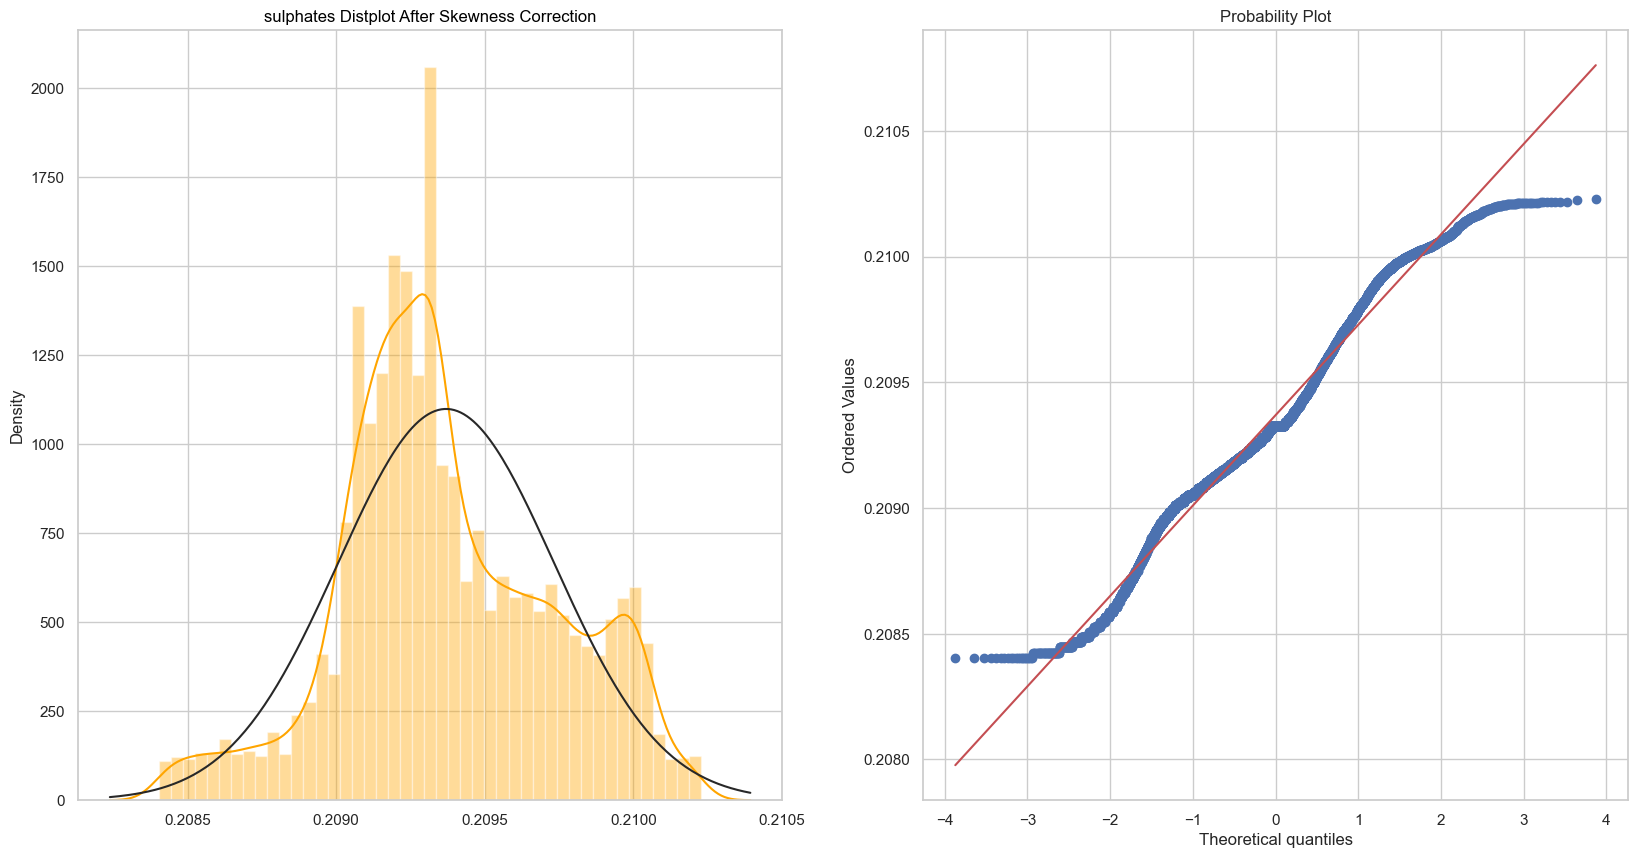

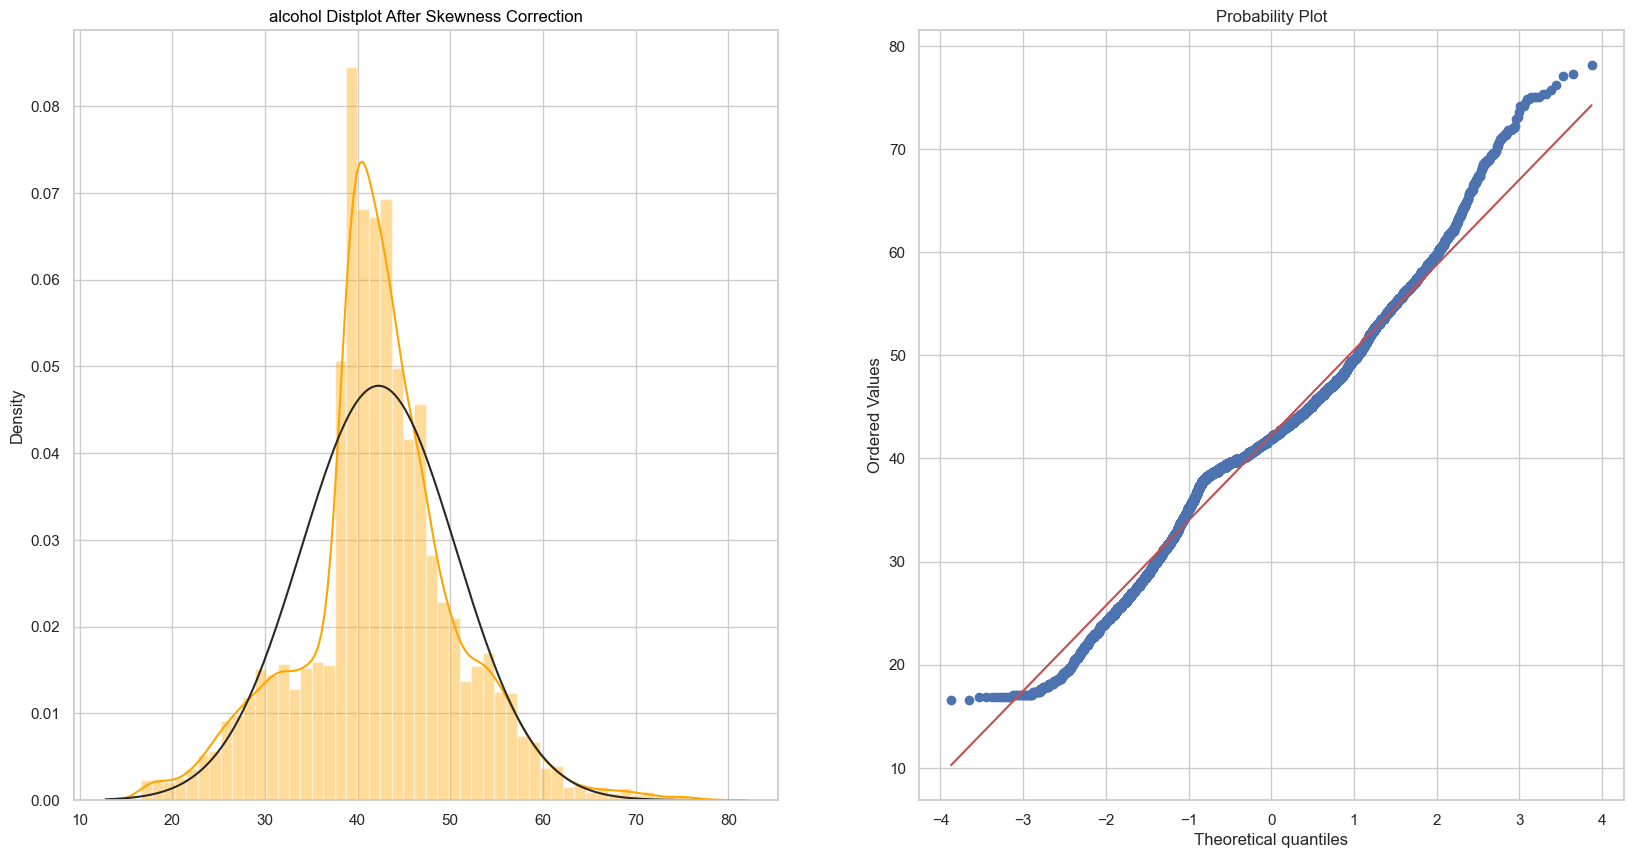

In [25]:
def skewness_correction(columnName, data):
    # Extract the column data
    column_data = data[columnName]
    
    # Remove non-finite values
    column_data = column_data[~np.isnan(column_data) & np.isfinite(column_data)]
    
    # Check if there are any valid values left
    if len(column_data) == 0:
        print(f"Error: No valid data in {columnName}")
        return column_data
    
    # Handle non-positive values by adding a constant
    constant = np.abs(np.min(column_data)) + 1
    column_data = column_data + constant
    
    # Perform Box-Cox transformation
    column_data, temp_params = boxcox(column_data)
    
    # Check for non-finite values after transformation
    if np.any(np.isnan(column_data)) or np.any(np.isinf(column_data)):
        print(f"Error: Transformed data for {columnName} contains non-finite values.")
        return column_data
    
    # Fit normal distribution to the transformed data
    mu, sigma = norm.fit(column_data)
    
    # Plot the distribution and probability plot
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(column_data, fit=norm, color="orange")
    plt.title(f"{columnName} Distplot After Skewness Correction", color="black")
    
    plt.subplot(1, 2, 2)
    probplot(column_data, plot=plt)
    plt.show()
    
    return column_data

# Call the function for each column in columns_to_plot
corrected_data_dict = {}

max_length = 0

for column in columns_to_plot:
    corrected_values = skewness_correction(column, df_without_outliers)
    corrected_data_dict[column] = corrected_values
    
    # Track the maximum length
    max_length = max(max_length, len(corrected_values))


__Inference__

As we know that box cox transformation works with skew data to form normal distribution and it uses probability density curve and probability plot. It uses theoretical quantities along the x axis and ordered values along the y axis, it works based on variables scale. For example, for ph acidity for wine measures as 3.2-3.6, its ph scale 0 to 7. In addition to that, totalsulfurdioxide, alcohol, sulphates features after corrected skewness with box cox method have also changed their distribution towards the normal. When all the data points flow along the line then distribution is normal. We have explained earlier how tail is working along the line in probability plot. After conversion skewness by using box cox method of transformation skewness improvement we could see from the above visualization.

In [26]:
# Fill missing values with NaN to ensure consistent lengths
for column, values in corrected_data_dict.items():
    corrected_data_dict[column] = np.append(values, [np.nan] * (max_length - len(values)))

# Create a new DataFrame with corrected values
corrected_df = pd.DataFrame(corrected_data_dict)

# Display the new DataFrame with corrected values
corrected_df

fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0          5.000425         0.159824    0.186731       7.463820   0.042708   
1          5.358560         0.159293    0.186613       6.728656   0.042708   
2          5.951693         0.159978    0.186665       6.184810   0.042702   
3          5.649242         0.159493    0.185534       6.410472   0.042708   
4          6.129370         0.159450    0.186875       5.775433   0.042703   
...             ...              ...         ...            ...        ...   
12790      5.483721         0.159712    0.187091       5.260607   0.042703   
12791      6.296091         0.159551    0.186025       7.927780   0.042706   
12792      5.717056         0.159304    0.186799       7.075936   0.042703   
12793      6.071440         0.159442    0.185713       7.259511   0.042702   
12794      5.532111         0.159151    0.186613       7.435067   0.042705   

       freesulfurdioxide  totalsulfurdioxide       density        ph  \
0              12.737051           73.234844  6.084795e+06  8.823993   
1              10.679580           77.750984  6.115822e+06  8.856971   
2              16.231272           60.484851  6.086893e+06  8.685471   
3              11.361719           56.762431  6.087968e+06  8.104706   
4              15.639355           55.699368  6.086355e+06  8.685471   
...                  ...                 ...           ...       ...   
12790          10.897345           54.587363  6.100652e+06  8.863566   
12791          13.128444           75.239118  6.086893e+06  9.568944   
12792          11.599487           55.699368  6.082997e+06  8.771226   
12793          11.673402           73.724327  6.082856e+06  9.246000   
12794          14.591814           71.019918  6.086329e+06  9.226224   

       sulphates    alcohol  
0       0.209295  40.843872  
1       0.209399  43.024898  
2       0.209176  68.284938  
3       0.209966  32.052267  
4       0.209950  49.646060  
...          ...        ...  
12790   0.209274  28.898751  
12791   0.209735  38.570426  
12792   0.209334  46.426393  
12793   0.209325  43.412984  
12794   0.208645  40.843872  

[12795 rows x 11 columns]

## Plots After Removing Outliers

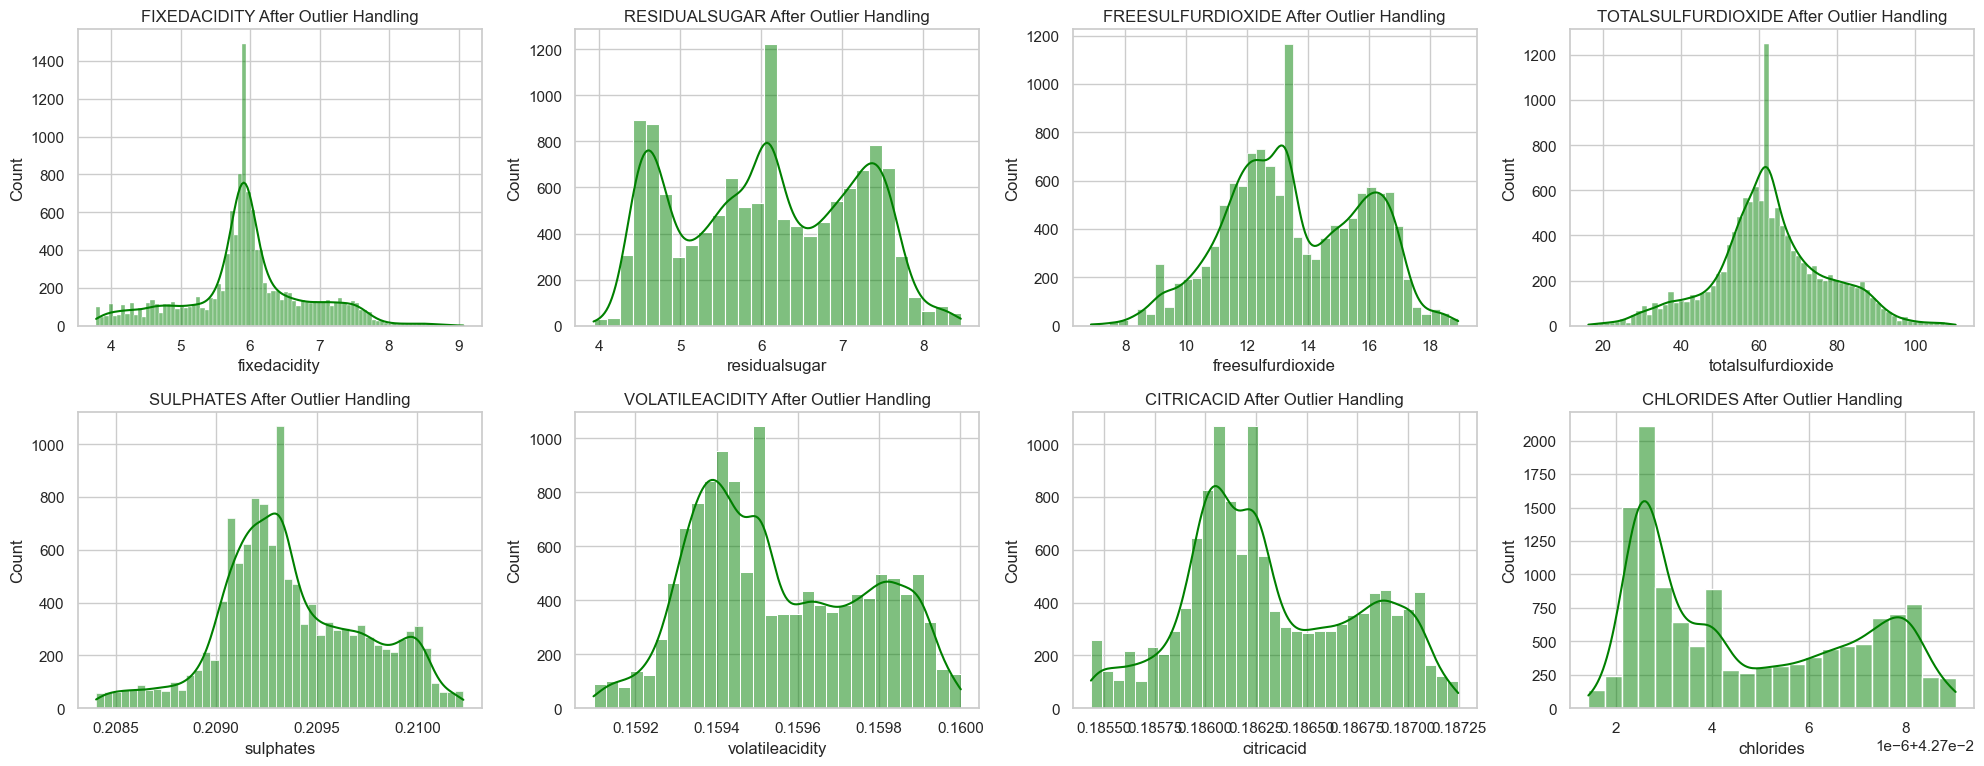

In [27]:
# Specify the columns for which outliers were handled
columns_to_plot_after_outlier_handling = ['fixedacidity', 'residualsugar', 'freesulfurdioxide', 'totalsulfurdioxide', 'sulphates', 'volatileacidity', 'citricacid', 'chlorides']

# Create histograms for selected columns after outlier handling
plt.figure(figsize=(20, 15))  # Set the overall size of the subplot grid

# Loop through the selected columns to create individual histograms
for i, column in enumerate(columns_to_plot_after_outlier_handling, 1):
    plt.subplot(4, 4, i)  # Create subplots in a 4x4 grid
    sns.histplot(corrected_df[column], kde=True, color="green")  # Plot histogram with KDE
    plt.title(f"{column.upper()} After Outlier Handling")  # Set the title of each subplot to the column name

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Display the plot


__Inference__

After removing outliers, correcting skewness, filling null values from our dataset, we can see the distribution of each variable is way much better than earlier. Now most of the features have normal and binomial distribution, polynomial (residualsugar) which is not the best but still better than earlier messy data. If we work more on this data, we can improve more even. 

## Specifying the Target Variable and Predictor Variables

In [28]:
X = corrected_df # Predictor variables as X
y = wine_df.target # target variable as y

In [29]:
# Split the data into train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Standardizing Independent Variables

In [30]:
# Create an instance of the StandardScaler
sc = StandardScaler()

# Fit and transform the training data (X_train) using the scaler
# The fit_transform method calculates the mean and standard deviation of each feature in X_train
# and scales the features based on these values.
X_train = sc.fit_transform(X_train)

# Transform the test data (X_test) using the same scaler
# It uses the mean and standard deviation learned from the training data to scale the test data consistently.
X_test = sc.transform(X_test)


In [31]:
# Display first two observations after transformation
X_train[:2]

array([[-6.81135343e-01, -9.47676912e-01, -5.51665544e-01,
         1.59898295e+00, -9.88532969e-01, -7.60700989e-01,
         9.52708468e-01,  1.75912451e+00,  1.55466581e-01,
        -2.95445432e-01, -4.72166165e-01],
       [ 1.23935334e+00, -6.06571263e-01,  8.85140920e-01,
        -4.01731356e-01, -9.21755520e-01, -1.37029217e+00,
        -4.21061976e-01, -1.02027499e+00,  8.10266896e-01,
         9.43543940e-01,  9.38015467e-04]])

In [32]:
# Display first two observations after transformation
X_test[:2]

array([[ 0.28855015, -1.28601681,  1.71833704,  0.11079263,  0.60199765,
         1.25286058, -0.07525766, -0.00502161, -0.49958898, -0.60274998,
        -0.30455545],
       [-1.12573583,  1.29360303, -0.66002174,  1.32127093,  1.28057805,
         0.87470838, -0.67351797, -2.93032182, -1.33367787,  1.51889086,
        -1.55220621]])

# Conclusion

The wine quality dataset is based on the subjective evaluation of wine experts, who rated the wines on a scale from 0 to 8 based on sensory attributes such as appearance, aroma, flavor, and mouthfeel. The quality ordinals do not necessarily reflect the objective quality of the wines, as different people may have different preferences and expectations for wine.
The dataset can help us understand how the physicochemical properties of wine affect its sensory attributes, such as appearance, aroma, flavor, and mouthfeel. It can certainly help wine growers and producers to determine the choice of procedures to use to create a certain type of wine. It can also enable us to create a classification or predictive model that can recommend wines that match different types of cuisines.
We have worked on data wrangling, finding missing values, outliers, skewness and treat them by using various treatment tools like box cox for skewness correction, outliers detection used interquartile range, fill null values used KNN imputer method. 
Therefore, the wine quality dataset does not convey the absolute or universal quality of the wines, but rather the relative or perceived quality of the wines according to a specific group of experts.

__Limitations__
Our task was limited to do only EDA and Data prep where from messy data to tidy data approcah for machine learning model building. So we have done our analysis so far according to our guideline. EDA with messy data and EDA after Data preprocessing.

# Acknowledgment

We learned a lot from this project of working with messy data.
The following resources were referred in writing this article :
- Professor Samar Deen Lecture materials from Canvas.
- Wine quality prediction using regression [Wine quality](https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46)
- Wine Quality Prediction [GeeksforGeeks](https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/)
- Wine Quality - [Scienedirect](https://www.sciencedirect.com/topics/food-science/wine-quality)